In [1]:
import pymysql
import pandas as pd

In [2]:
def push(query):
    try:
        connection = pymysql.connect(
            host='localhost',
            port=3306,
            user='root',
            password='lolik`12*-',
            database='stepik',
            cursorclass=pymysql.cursors.DictCursor,
        )
        print('Succesfully connect')
        print('#' * 20)

        try:
            with connection.cursor() as cursor:
                cursor.execute(query)
                print(f'{' '.join(query.split()[:2])} succesfully')
                if query.split()[0].lower() in ['select', 'show']:
                    return cursor
                if query.split()[0].lower() in ['insert', 'update', 'delete']:
                    connection.commit()

        finally:
            connection.close()

    except Exception as ex:
        print('Connection refused...')
        print(ex)

In [3]:
# Команды из набора DDL – Data Definition Language (язык описания данных):
# ALTER
# CREATE
# DROP

# Команды из набора DML – Data Manipulation Language (язык манипулирования данными):
# SELECT – выборка данных
# INSERT – вставка новых данных
# UPDATE – обновление данных
# DELETE – удаление данных
# MERGE – слияние данных

# 2. Проектирование БД (команды DDL)

In [4]:
# Удаление всех таблиц

push('DROP TABLE IF EXISTS channel_subscribers')
push('DROP TABLE IF EXISTS channels')
push('DROP TABLE IF EXISTS group_messages')
push('DROP TABLE IF EXISTS `groups`')
push('DROP TABLE IF EXISTS private_messages')
push('DROP TABLE IF EXISTS stories_likes')
push('DROP TABLE IF EXISTS stories')
push('DROP TABLE IF EXISTS user_settings')
push('DROP TABLE IF EXISTS languages')
push('DROP TABLE IF EXISTS users')

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully


In [5]:
# Создание таблицы users
create_table_query = """
CREATE TABLE users(
    id BIGINT UNSIGNED NOT NULL AUTO_INCREMENT PRIMARY KEY,
    firstname VARCHAR(100),
    lastname VARCHAR(100) COMMENT 'фамилия',
    login VARCHAR(100),
    email VARCHAR(100) UNIQUE,
    password_hash VARCHAR(256),
    phone BIGINT UNSIGNED UNIQUE,
    birthday DATE,
    
    INDEX idx_users_username(firstname, lastname)
) COMMENT 'пользователи';"""

push(create_table_query)

Succesfully connect
####################
CREATE TABLE succesfully


In [6]:
# Удаление таблицы
drop_table_query = 'DROP TABLE IF EXISTS user_settings'
push(drop_table_query)

Succesfully connect
####################
DROP TABLE succesfully


In [7]:
# Создание таблицы user_settings

# 1 x 1
create_table_query = """
CREATE TABLE user_settings(
    user_id BIGINT UNSIGNED NOT NULL,
    is_premium_account BIT,
    is_night_mode_enabled BIT,
    color_scheme ENUM('classic', 'day', 'tinted', 'night'),
    LANGUAGE ENUM('english', 'french', 'russian', 'german', 'belorussian', 'croatian', 'dutch'),
    status_text VARCHAR(70),
    notifications_and_sounds JSON,
    created_at DATETIME DEFAULT NOW()
);"""

push(create_table_query)

Succesfully connect
####################
CREATE TABLE succesfully


In [8]:
# Создание связи с таблицами user_settings и users
alter_table_query = """
ALTER TABLE user_settings ADD CONSTRAINT fk_user_settings_user_id
FOREIGN KEY (user_id) REFERENCES users(id)
ON UPDATE CASCADE
ON DELETE RESTRICT;
"""

push(alter_table_query)

Succesfully connect
####################
ALTER TABLE succesfully


In [9]:
# Добавление строки в таблицу users

# insert_query = "INSERT INTO users (id, firstname, lastname, email, phone) VALUES ('2', 'Kelsie', 'Olson', 'xheidenereich@example.net', '9548489264');"

# можно не указывать автоинкрементное (AUTO_INCREMENT) поле
insert_query = """INSERT INTO users (firstname, lastname, email, phone, birthday) VALUES
('Ozella', 'Hauck', 'idickens@example.com', '9773438197', '1997-01-01'),
('Emmet', 'Hammes', 'qcremin@example.org', '9694110645', '1993-01-01'),
('Lori', 'Koch', 'damaris34@example.net', '9192291407', '1995-01-01'),
('Sam', 'Kuphal', 'telly.miller@example.net', '9917826315', '1999-01-01');"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [10]:
# Запрос селект
select_query = 'SELECT * FROM users'
rows = push(select_query).fetchall()
for row in rows:
    print(row)

Succesfully connect
####################
SELECT * succesfully
{'id': 1, 'firstname': 'Ozella', 'lastname': 'Hauck', 'login': None, 'email': 'idickens@example.com', 'password_hash': None, 'phone': 9773438197, 'birthday': datetime.date(1997, 1, 1)}
{'id': 2, 'firstname': 'Emmet', 'lastname': 'Hammes', 'login': None, 'email': 'qcremin@example.org', 'password_hash': None, 'phone': 9694110645, 'birthday': datetime.date(1993, 1, 1)}
{'id': 3, 'firstname': 'Lori', 'lastname': 'Koch', 'login': None, 'email': 'damaris34@example.net', 'password_hash': None, 'phone': 9192291407, 'birthday': datetime.date(1995, 1, 1)}
{'id': 4, 'firstname': 'Sam', 'lastname': 'Kuphal', 'login': None, 'email': 'telly.miller@example.net', 'password_hash': None, 'phone': 9917826315, 'birthday': datetime.date(1999, 1, 1)}


In [11]:
# Удаление строк
drop_row_query = 'DELETE FROM users WHERE id IN (1, 2)'
push(drop_row_query)

Succesfully connect
####################
DELETE FROM succesfully


In [12]:
# Добавление, изменение типа, переименование, удавление полей таблицы
add_column_query = "ALTER TABLE users ADD COLUMN birthday DATETIME"
push(add_column_query)

modify_column_query = "ALTER TABLE users MODIFY COLUMN birthday DATE"
push(modify_column_query)

rename_column_query = "ALTER TABLE users RENAME COLUMN birthday to date_of_birth"
push(rename_column_query)

# drop_column_query = "ALTER TABLE users DROP COLUMN date_of_birth"
# push(drop_column_query)

Succesfully connect
####################
Connection refused...
(1060, "Duplicate column name 'birthday'")
Succesfully connect
####################
ALTER TABLE succesfully
Succesfully connect
####################
ALTER TABLE succesfully


In [13]:
pd.DataFrame(rows)

id firstname lastname login                     email password_hash  \
0   1    Ozella    Hauck  None      idickens@example.com          None   
1   2     Emmet   Hammes  None       qcremin@example.org          None   
2   3      Lori     Koch  None     damaris34@example.net          None   
3   4       Sam   Kuphal  None  telly.miller@example.net          None   

        phone    birthday  
0  9773438197  1997-01-01  
1  9694110645  1993-01-01  
2  9192291407  1995-01-01  
3  9917826315  1999-01-01

In [14]:
# Изменение полей в user_settings
add_property_query = "ALTER TABLE user_settings ADD PRIMARY KEY (user_id)"
push(add_property_query)

# modify_column_query = "ALTER TABLE user_settings MODIFY COLUMN user_id BIGINT UNSIGNED NOT NULL PRIMATY KEY"
# push(modify_column_query)

rename_column_query = "ALTER TABLE user_settings RENAME COLUMN LANGUAGE to app_language"
push(rename_column_query)

Succesfully connect
####################
ALTER TABLE succesfully
Succesfully connect
####################
ALTER TABLE succesfully


In [15]:
# Создание таблицы private_messages

push('DROP TABLE IF EXISTS private_messages;')

# 1 x M
create_table_query = """
CREATE TABLE private_messages(
    id SERIAL,
    sender_id BIGINT UNSIGNED NOT NULL,
    receiver_id BIGINT UNSIGNED NOT NULL,
    reply_to_id BIGINT UNSIGNED NULL,
    media_type ENUM('text', 'image', 'audio', 'video'),
    body TEXT,
    filename VARCHAR(200),
    created_at DATETIME DEFAULT NOW(),

    FOREIGN KEY (sender_id) REFERENCES users(id),
    FOREIGN KEY (receiver_id) REFERENCES users(id),
    FOREIGN KEY (reply_to_id) REFERENCES private_messages(id)
);
"""
push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [16]:
# Создание таблицы groups

push('DROP TABLE IF EXISTS `groups`;')

create_table_query = """
CREATE TABLE `groups` (
    id SERIAL,
    title VARCHAR(45),
    icon VARCHAR(45),
    invite_link VARCHAR(100),
    settings JSON,
    owner_user_id BIGINT UNSIGNED NOT NULL,
    is_private BIT,
    created_at DATETIME DEFAULT NOW(),

    FOREIGN KEY (owner_user_id) REFERENCES users (id)
);
"""

push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################


CREATE TABLE succesfully


In [17]:
# Создание таблицы group_messages

push('DROP TABLE IF EXISTS `group_messages`;')

create_table_query = """
CREATE TABLE `group_messages` (
    id SERIAL,
    group_id BIGINT UNSIGNED NOT NULL,
    sender_id BIGINT UNSIGNED NOT NULL,
    reply_to_id BIGINT UNSIGNED NULL,
    media_type ENUM('text', 'image', 'audio', 'video'),
    body TEXT,
    filename VARCHAR(100) NULL,
    created_at DATETIME DEFAULT NOW(),

    FOREIGN KEY (sender_id) REFERENCES users (id),
    FOREIGN KEY (group_id) REFERENCES `groups` (id),
    FOREIGN KEY (reply_to_id) REFERENCES group_messages (id)
);
"""
push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [18]:
# Создание таблицы channels

push('DROP TABLE IF EXISTS `channels`;')

create_table_query = """
CREATE TABLE channels (
    id SERIAL,
    title VARCHAR(45),
    icon VARCHAR(45),
    invite_link VARCHAR(100),
    settings JSON,
    owner_user_id BIGINT UNSIGNED NOT NULL,
    is_private BIT,
    created_at DATETIME DEFAULT NOW(),
    
    FOREIGN KEY (owner_user_id) REFERENCES users (id)    
);
"""
push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [19]:
# Создание таблицы group_messages

push('DROP TABLE IF EXISTS `channel_subscribers`;')

# M x M
create_table_query = """
CREATE TABLE channel_subscribers (
    channel_id BIGINT UNSIGNED NOT NULL,
    user_id BIGINT UNSIGNED NOT NULL,
    status ENUM('requested', 'joined', 'left'),
    created_at DATETIME DEFAULT NOW(),
    updated_at DATETIME ON UPDATE CURRENT_TIMESTAMP,

    PRIMARY KEY (user_id, channel_id),
    FOREIGN KEY (user_id) REFERENCES users (id),
    FOREIGN KEY (channel_id) REFERENCES channels (id)
);
"""
push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [20]:
# Создание таблицы group_messages

push('DROP TABLE IF EXISTS stories;')

create_table_query = """
CREATE TABLE stories (
    id SERIAL,
    user_id BIGINT UNSIGNED NOT NULL,
    caption VARCHAR(140),
    filename VARCHAR(100),
    views_count INT UNSIGNED,
    created_at DATETIME DEFAULT NOW(),

    FOREIGN KEY (user_id) REFERENCES users (id)
);
"""
push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [21]:
# Создание таблицы group_messages

push('DROP TABLE IF EXISTS stories_likes;')

create_table_query = """
CREATE TABLE stories_likes (
	id SERIAL,
	story_id BIGINT UNSIGNED NOT NULL,
	user_id BIGINT UNSIGNED NOT NULL,
	created_at DATETIME DEFAULT NOW(),

	FOREIGN KEY (user_id) REFERENCES users (id),		
	FOREIGN KEY (story_id) REFERENCES stories (id)
);"""

push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [22]:
# В связи с активным развитием проекта принято архитектурное решение вынести информацию о языках приложения 
# из поля app_language в таблице user_settings в отдельную таблицу-справочник языков.

# Архитектор обосновывает решение тем, что при добавлении нового языка в платформу проще добавить новую строку в таблицу, 
# чем изменять существующее поле в таблице.

In [23]:
# Сначала создадим таблицу languages.

# Поля:
# id - целочисленный первичный ключ (для простоты договоримся использовать псевдотип SERIAL)
# name - строка, название языка (содержит только уникальные значения, не может быть пустым)

push('DROP TABLE IF EXISTS languages;')

create_table_query = """
CREATE TABLE languages (
    id SERIAL,
    name VARCHAR(100) NOT NULL UNIQUE
);
"""

push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [24]:
# Теперь добавим новое поле language_id в таблицу user_settings.
# Тип данных нового поля должен строго совпадать с полем id в таблице languages.

add_column_query = """
ALTER TABLE user_settings 
ADD COLUMN language_id BIGINT UNSIGNED;
"""

push(add_column_query)

Succesfully connect
####################
ALTER TABLE succesfully


In [25]:
# Теперь необходимо сделать поле language_id в таблице user_settings внешним ключом, 
# ссылающимся на идентификатор строки в таблице languages.

add_foreign_key_query = """
ALTER TABLE user_settings
ADD CONSTRAINT fk_language_id_id
FOREIGN KEY (language_id) REFERENCES languages(id)
ON DELETE CASCADE
ON UPDATE CASCADE;
"""

push(add_foreign_key_query)

Succesfully connect
####################
ALTER TABLE succesfully


In [26]:
# Другие люди заполнили таблицу languages нужными данными и проставили правильные значения в поле language_id.
# Осталось удалить поле app_language из таблицы user_settings, потому что теперь оно лишь дублирует новый функционал.

drop_column_query = """
ALTER TABLE user_settings
DROP COLUMN app_language;
"""

push(drop_column_query)

Succesfully connect
####################
ALTER TABLE succesfully


# 3. Работа с данными (команды DML, CRUD)

## 3.1  Команда INSERT

In [27]:
# Очистка таблицы (пересоздаем)

truncate_query = 'TRUNCATE users'
push(truncate_query)

Succesfully connect
####################
Connection refused...
(1701, 'Cannot truncate a table referenced in a foreign key constraint (`stepik`.`user_settings`, CONSTRAINT `fk_user_settings_user_id`)')


In [28]:
# базовый вариант команды INSERT

insert_query = """
INSERT INTO users (id, firstname, lastname, email, phone, date_of_birth)
VALUES ('1', 'Kelsie', 'Olson', 'xheidenreich@example.net', '9548492646', '2000-01-01');"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [29]:
# можно не указывать автоинкрементное (AUTO_INCREMENT) поле
insert_query = """
INSERT INTO users (firstname, lastname, email, phone, date_of_birth)
VALUES ('Celestino', 'Cruickshank', 'flavio.hammes2@example.com', '9686686722', '2011-01-01');"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [30]:
# идентификаторы можно добавлять не по порядку
insert_query = """
INSERT INTO users (id, firstname, lastname, email, phone, date_of_birth)
VALUES ('93', 'Gregory', 'Jenkins', 'weimann.richard@example.com', '9860971258', '2011-01-01');"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [31]:
# добавим колонку is_deleted
add_column_query = "ALTER TABLE users ADD COLUMN is_deleted BIT DEFAULT 0;"

push(add_column_query)

Succesfully connect
####################
ALTER TABLE succesfully


In [32]:
# значение по умолчанию для поля is_deleted
# insert_query = """
# INSERT INTO users (firstname, lastname, is_deleted)
# VALUES ('Celestino', 'Cruickshank', DEFAULT);"""

# push(insert_query)

In [33]:
# не указываем имена полей - рабочий вариант
insert_query = """
INSERT INTO users
VALUES (101, 'Eleonore', 'Ward', NULL, 'antonietta333@example.com',DEFAULT, 9397815333, '2000-01-01', 0);"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [34]:
# пакетная вставка данных - работает быстро (одиночная вставка данных - работает медленно)
insert_query = """
INSERT INTO users (firstname, lastname, email, phone, date_of_birth) VALUES
('Ozella', 'Hauck', 'idickens@example.com', '9773438197', '1989-01-01'),
('Emmet', 'Hammes', 'qcremin@example.org', '9694110645', '1991-01-01'),
('Lori', 'Koch', 'damaris34@example.net', '9192291407', '1990-01-01'),
('Sam', 'Kuphal', 'telly.miller@example.net', '9917826315', '1995-01-01');"""

push(insert_query)

Succesfully connect
####################
Connection refused...
(1062, "Duplicate entry 'damaris34@example.net' for key 'users.email'")


In [35]:
# второй вариант команды INSERT (можно вставить только 1 строку)
insert_query = """
INSERT INTO users
SET
    firstname = 'Miguel',
    lastname = 'Watsica',
    email = 'hassan.kuphal@example.org',
    login = 'hassan_kuphal',
    phone = '9824696112'
;"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [36]:
# INSERT-SELECT
insert_query = """
INSERT INTO users
    (firstname, lastname, email, phone, date_of_birth)
SELECT
    'Sam2', 'Kuphal2', 'telly.miller222@example.net', '9917826222', '2021-01-01';"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [37]:
# опция ON DUPLICATE KEY UPDATE позволяет выполнить обновление
insert_query = """
INSERT INTO users (id, firstname, lastname, email, phone, date_of_birth)
VALUES (2, 'Lucile', 'Rolfson', 'dbartell@example.net', 9258387168, '2021-01-01')
ON DUPLICATE KEY UPDATE
    firstname = 'Lucile',
    lastname = 'Rolfson',
    email = 'dbartell@example.net',
    phone = 9258387168
;"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


## 3.2 Команда SELECT

In [38]:
# Вывод текста:
select_query = "SELECT 'Hello world';"

push(select_query)

Succesfully connect
####################
SELECT 'Hello succesfully


In [39]:
# вывести всю таблицу users (все поля, все строки):
select_query = """
SELECT *
FROM users;"""

pd.DataFrame(push(select_query)).head(5)

Succesfully connect
####################
SELECT * succesfully


id  firstname     lastname login                       email password_hash  \
0   1     Kelsie        Olson  None    xheidenreich@example.net          None   
1   2     Lucile      Rolfson  None        dbartell@example.net          None   
2   3       Lori         Koch  None       damaris34@example.net          None   
3   4        Sam       Kuphal  None    telly.miller@example.net          None   
4   5  Celestino  Cruickshank  None  flavio.hammes2@example.com          None   

        phone date_of_birth is_deleted  
0  9548492646    2000-01-01    b'\x00'  
1  9258387168    2021-01-01    b'\x00'  
2  9192291407    1995-01-01    b'\x00'  
3  9917826315    1999-01-01    b'\x00'  
4  9686686722    2011-01-01    b'\x00'

In [40]:
# явно указываем поля, которые необходимо вывести:
select_query = """
SELECT id, firstname , lastname , login , email , password_hash , phone, is_deleted
FROM users;"""

pd.DataFrame(push(select_query)).head(5)

Succesfully connect
####################
SELECT id, succesfully


id  firstname     lastname login                       email password_hash  \
0   1     Kelsie        Olson  None    xheidenreich@example.net          None   
1   2     Lucile      Rolfson  None        dbartell@example.net          None   
2   3       Lori         Koch  None       damaris34@example.net          None   
3   4        Sam       Kuphal  None    telly.miller@example.net          None   
4   5  Celestino  Cruickshank  None  flavio.hammes2@example.com          None   

        phone is_deleted  
0  9548492646    b'\x00'  
1  9258387168    b'\x00'  
2  9192291407    b'\x00'  
3  9917826315    b'\x00'  
4  9686686722    b'\x00'

In [41]:
# выводим пользователя по его идентификатору (с лимитом 10 с сортировкой по имени):
select_query = """
SELECT *
FROM users
WHERE id < 5 or id IN (5, 7)
ORDER BY firstname DESC
LIMIT 10;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  firstname     lastname login                       email password_hash  \
0   4        Sam       Kuphal  None    telly.miller@example.net          None   
1   2     Lucile      Rolfson  None        dbartell@example.net          None   
2   3       Lori         Koch  None       damaris34@example.net          None   
3   1     Kelsie        Olson  None    xheidenreich@example.net          None   
4   5  Celestino  Cruickshank  None  flavio.hammes2@example.com          None   

        phone date_of_birth is_deleted  
0  9917826315    1999-01-01    b'\x00'  
1  9258387168    2021-01-01    b'\x00'  
2  9192291407    1995-01-01    b'\x00'  
3  9548492646    2000-01-01    b'\x00'  
4  9686686722    2011-01-01    b'\x00'

In [42]:
# выводим количество строк с указанным именем:
select_query = """
SELECT count(firstname)
FROM users;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT count(firstname) succesfully


count(firstname)
0                 9

In [43]:
# выводим количество строк с уникальными именами:
select_query = """
SELECT count(DISTINCT firstname) as DISTINCT_COUNT
FROM users;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT count(DISTINCT succesfully


DISTINCT_COUNT
0               9

## 3.3 Команда UPDATE

In [44]:
# вставим новую строку в таблицу channels
# (создадим новый канал)

push("""INSERT INTO channels(title, invite_link, owner_user_id, is_private)
VALUES ('MySQL news', 'https://t.me/mysql_news', 1, true);""")


Succesfully connect
####################
INSERT INTO succesfully


In [45]:
# вставим новые строки в таблицу channel_subscribers
# (пользователи отправляют заявки на вступление в канал)
push("""INSERT INTO channel_subscribers(channel_id, user_id, status)
VALUES (1, 2, 'requested');""")
     
push("""INSERT INTO channel_subscribers(channel_id, user_id, status)
VALUES (1, 3, 'requested');""")

push("""INSERT INTO channel_subscribers(channel_id, user_id, status)
VALUES (1, 4, 'requested');""")

Succesfully connect
####################
INSERT INTO succesfully
Succesfully connect
####################
INSERT INTO succesfully
Succesfully connect
####################
INSERT INTO succesfully


In [46]:
# обновит все строки в таблице channel_subscribers (плохо!)
push("""UPDATE channel_subscribers
SET
    status = 'joined';""")

Succesfully connect
####################
UPDATE channel_subscribers succesfully


In [47]:
# админ подтверждает добавление подписчика в канал
push("""UPDATE channel_subscribers
SET
    status = 'joined'
WHERE channel_id = 1 AND user_id = 2;""")

push("""UPDATE channel_subscribers
SET
    status = 'joined'
WHERE channel_id = 1 AND user_id = 3;""")

Succesfully connect
####################
UPDATE channel_subscribers succesfully
Succesfully connect
####################
UPDATE channel_subscribers succesfully


In [48]:
# пользователь покидает канал
push("""UPDATE channel_subscribers
SET
    status = 'left'
WHERE channel_id = 1 AND user_id = 2;""")

Succesfully connect
####################
UPDATE channel_subscribers succesfully


In [49]:
# добавим новый статус 'удален'
push("""ALTER TABLE channel_subscribers
MODIFY COLUMN status ENUM('requested', 'joined', 'left', 'removed');""")

Succesfully connect
####################
ALTER TABLE succesfully


In [50]:
# пользователя принудительно удалили из канала
push("""UPDATE channel_subscribers
SET
    status = 'removed'
WHERE channel_id = 1 AND user_id = 4;""")

Succesfully connect
####################
UPDATE channel_subscribers succesfully


In [51]:
# переименуем канал
push("""UPDATE channels
SET title = 'General SQL news'
WHERE id = 1;""")

Succesfully connect
####################
UPDATE channels succesfully


In [52]:
pd.DataFrame(push("SELECT * FROM channel_subscribers"))

Succesfully connect
####################
SELECT * succesfully


channel_id  user_id   status          created_at          updated_at
0           1        2     left 2025-03-14 17:46:09 2025-03-14 17:46:09
1           1        3   joined 2025-03-14 17:46:09 2025-03-14 17:46:09
2           1        4  removed 2025-03-14 17:46:09 2025-03-14 17:46:09

## 3.4 Команда DELETE

In [53]:
# удаляем все строки из таблицы сообщений 
# (очищает данные, индексация сохраняется после удаления данных)

push("DELETE FROM private_messages;")

Succesfully connect
####################
DELETE FROM succesfully


In [54]:
# пересоздаем таблицу сообщений (DROP-CREATE)
# (пересоздается таблица, индексация следовательно обнуляется)

push("TRUNCATE private_messages;")

Succesfully connect
####################
TRUNCATE private_messages; succesfully


In [55]:
columns = push('SHOW COLUMNS FROM private_messages')

fields_df = pd.DataFrame(columns)
fields_df

Succesfully connect
####################
SHOW COLUMNS succesfully


Field                                  Type Null  Key  \
0           id                       bigint unsigned   NO  PRI   
1    sender_id                       bigint unsigned   NO  MUL   
2  receiver_id                       bigint unsigned   NO  MUL   
3  reply_to_id                       bigint unsigned  YES  MUL   
4   media_type  enum('text','image','audio','video')  YES        
5         body                                  text  YES        
6     filename                          varchar(200)  YES        
7   created_at                              datetime  YES        

             Default              Extra  
0               None     auto_increment  
1               None                     
2               None                     
3               None                     
4               None                     
5               None                     
6               None                     
7  CURRENT_TIMESTAMP  DEFAULT_GENERATED

In [56]:
print(fields_df['Field'].to_list())

['id', 'sender_id', 'receiver_id', 'reply_to_id', 'media_type', 'body', 'filename', 'created_at']


In [57]:
push("DROP TABLE IF EXISTS `private_messages`;")
     
create_table_query = """
CREATE TABLE `private_messages`(
    `id` SERIAL,
    `sender_id` BIGINT UNSIGNED NOT NULL,
    `receiver_id` BIGINT UNSIGNED NOT NULL,
    `reply_to_id` BIGINT UNSIGNED NULL,
    `media_type` ENUM('text', 'image', 'audio', 'video'),
    `body` TEXT,
    `filename` VARCHAR(200),
    `created_at` DATETIME DEFAULT NOW(),

    FOREIGN KEY (sender_id) REFERENCES users(id),
    FOREIGN KEY (receiver_id) REFERENCES users(id),
    FOREIGN KEY (reply_to_id) REFERENCES private_messages(id) 

    

);"""

push(create_table_query)

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
CREATE TABLE succesfully


In [58]:
# подготовка данных (добавляем несколько сообщений между пользователями)
insert_query = """
INSERT INTO `private_messages`(sender_id, receiver_id, media_type, body, filename, created_at)
VALUES
(1,2,'text','Eveniet suscipit ullam occaecati consequatur hic. Nulla est in molestiae odit. Placeat perferendis consequatur qui omnis id vel autem.','officiis','2010-04-07 09:01:02'),
(2,1,'audio','Non repudiandae maiores molestiae vel doloribus. Quis facere blanditiis est magnam est ut vero.','qui','1971-05-29 07:31:20'),
(1,3,'text','Voluptas qui consequatur quae sunt et consequatur. Rem alias sed cupiditate explicabo voluptate. Officiis repellat porro accusamus eveniet quos. Laborum dolores sed enim aut.','excepturi','1998-10-28 20:08:01'),
(1,4,'video','Est delectus tempora exercitationem atque tempora reiciendis nulla voluptatem. Cupiditate non fugit blanditiis quasi ad et autem expedita. Aut est provident odio quasi possimus.','vitae','2001-12-03 15:54:43'),
(1,2,'video','Est ducimus amet et asperiores. Reiciendis debitis qui ipsa. Nemo laboriosam ea aut omnis voluptates quisquam accusantium. Quibusdam totam similique aut.','optio','1970-09-18 20:39:35'),
(1,2,'video','Quis cupiditate quis maxime et placeat consectetur ut quis. Voluptas unde voluptatem deserunt in dolorum maxime. Sunt fugiat sit tenetur placeat at.','laboriosam','1980-05-11 03:39:43'),
(2,1,'audio','Voluptatum nihil rem laboriosam delectus aperiam consequuntur et modi. Laudantium molestias corporis quo omnis ut ea. At minima iure et voluptatum culpa deleniti non. Sint laboriosam molestias dolor vel. Quibusdam omnis quas ullam dolor.','sit','1988-08-19 10:30:44'),
(2,4,'audio','Nemo eos sed aspernatur voluptates perspiciatis tenetur. Voluptas sunt magnam vero nam earum. Magnam eum vitae qui. Vel atque accusantium in non rem non et.','consectetur','1984-06-28 16:22:44'),
(4,5,'audio','Quod nihil possimus id qui. Quasi officia rerum eum doloribus est voluptas maxime. Et debitis enim non enim fugit.','repellat','1981-12-11 16:04:11'),
(3,1,'text','Qui voluptatem earum temporibus rem vel sequi. Et quasi vel qui est autem aliquam. Modi est voluptatem aut rerum ea velit. Voluptate et eligendi debitis nostrum nihil dolorum.','nihil','1988-02-16 13:29:14'),
(3,2,'image','Rem et ullam cum vitae autem reprehenderit quia. Enim a ipsam id ut aliquam est error. Quis dolorum omnis expedita eaque maiores illo.','et','2015-04-07 18:02:42')
;"""

push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [59]:
pd.DataFrame(push("SELECT * FROM private_messages"))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0    1          1            2        None       text   
1    2          2            1        None      audio   
2    3          1            3        None       text   
3    4          1            4        None      video   
4    5          1            2        None      video   
5    6          1            2        None      video   
6    7          2            1        None      audio   
7    8          2            4        None      audio   
8    9          4            5        None      audio   
9   10          3            1        None       text   
10  11          3            2        None      image   

                                                 body     filename  \
0   Eveniet suscipit ullam occaecati consequatur h...     officiis   
1   Non repudiandae maiores molestiae vel doloribu...          qui   
2   Voluptas qui consequatur quae sunt et consequa...    excepturi   
3   Est delectus tempora exercitationem atque temp...        vitae   
4   Est ducimus amet et asperiores. Reiciendis deb...        optio   
5   Quis cupiditate quis maxime et placeat consect...   laboriosam   
6   Voluptatum nihil rem laboriosam delectus aperi...          sit   
7   Nemo eos sed aspernatur voluptates perspiciati...  consectetur   
8   Quod nihil possimus id qui. Quasi officia reru...     repellat   
9   Qui voluptatem earum temporibus rem vel sequi....        nihil   
10  Rem et ullam cum vitae autem reprehenderit qui...           et   

            created_at  
0  2010-04-07 09:01:02  
1  1971-05-29 07:31:20  
2  1998-10-28 20:08:01  
3  2001-12-03 15:54:43  
4  1970-09-18 20:39:35  
5  1980-05-11 03:39:43  
6  1988-08-19 10:30:44  
7  1984-06-28 16:22:44  
8  1981-12-11 16:04:11  
9  1988-02-16 13:29:14  
10 2015-04-07 18:02:42

In [60]:
# удаляем сообщения от пользователя номер 1 к пользователю номер 2
delete_query = """
DELETE FROM private_messages
WHERE sender_id = 1 AND receiver_id IN (2, 4) OR sender_id = 2;"""

push(delete_query)

Succesfully connect
####################
DELETE FROM succesfully


In [61]:
pd.DataFrame(push("SELECT * FROM private_messages"))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0   3          1            3        None       text   
1   9          4            5        None      audio   
2  10          3            1        None       text   
3  11          3            2        None      image   

                                                body   filename  \
0  Voluptas qui consequatur quae sunt et consequa...  excepturi   
1  Quod nihil possimus id qui. Quasi officia reru...   repellat   
2  Qui voluptatem earum temporibus rem vel sequi....      nihil   
3  Rem et ullam cum vitae autem reprehenderit qui...         et   

           created_at  
0 1998-10-28 20:08:01  
1 1981-12-11 16:04:11  
2 1988-02-16 13:29:14  
3 2015-04-07 18:02:42

In [62]:
# пробуем удалить пользователя номер 3
push("""DELETE FROM users
WHERE id = 3;""")

Succesfully connect
####################
Connection refused...
(1451, 'Cannot delete or update a parent row: a foreign key constraint fails (`stepik`.`channel_subscribers`, CONSTRAINT `channel_subscribers_ibfk_1` FOREIGN KEY (`user_id`) REFERENCES `users` (`id`))')


In [63]:
# сначала удаляем его подписки на каналы
push("""DELETE FROM channel_subscribers
WHERE user_id = 3;""")

Succesfully connect
####################
DELETE FROM succesfully


In [64]:
# удаляем сообщения пользователя номер 3
push("""DELETE FROM private_messages
WHERE sender_id = 3 OR receiver_id = 3;""")

Succesfully connect
####################
DELETE FROM succesfully


In [65]:
# добавим флаг для удаленных сообщений (вместо физического удаления строк)
push("ALTER TABLE private_messages ADD COLUMN is_deleted BIT NOT NULL DEFAULT 0;")

Succesfully connect
####################
ALTER TABLE succesfully


In [66]:
# отмечаем сообщения удаленными
push("""UPDATE private_messages
SET is_deleted = 1
WHERE sender_id = 2 AND receiver_id = 1;""")

Succesfully connect
####################
UPDATE private_messages succesfully


In [67]:
pd.DataFrame(push("SELECT * FROM private_messages"))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0   9          4            5        None      audio   

                                                body  filename  \
0  Quod nihil possimus id qui. Quasi officia reru...  repellat   

           created_at is_deleted  
0 1981-12-11 16:04:11    b'\x00'

## 3.5 Сервисы для генерации данных

Сервисы для генерации данных: <br>
http://filldb.info/ <br>
http://www.generatedata.com/ <br>
https://sourceforge.net/p/benerator/wiki/Home/ <br>
http://www.dominicgiles.com/datagenerator.html <br>

## 3.6 Открытие SQL-скрипта. Полная генерация базы данных

In [68]:
# Удаление всех таблиц

push('DROP TABLE IF EXISTS channel_message_reactions')
push('DROP TABLE IF EXISTS channel_subscribers')
push('DROP TABLE IF EXISTS channels')
push('DROP TABLE IF EXISTS group_messages')
push('DROP TABLE IF EXISTS `groups`')
push('DROP TABLE IF EXISTS private_messages')
push('DROP TABLE IF EXISTS stories_likes')
push('DROP TABLE IF EXISTS stories')
push('DROP TABLE IF EXISTS user_settings')
push('DROP TABLE IF EXISTS languages')
push('DROP TABLE IF EXISTS users')

Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully
Succesfully connect
####################
DROP TABLE succesfully


In [69]:
import mysql.connector
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='lolik`12*-',
)

cursor = connection.cursor()

with open('data/fulldb-telegram.sql', encoding="utf-8") as f:
    commands = f.read().split(';')

for command in commands:
    cursor.execute(command)
    print(command)

connection.close()

-- MariaDB dump 10.19  Distrib 10.11.7-MariaDB, for Linux (x86_64)
--
-- Host: mysql.hostinger.ro    Database: u574849695_23
-- ------------------------------------------------------
-- Server version	10.11.7-MariaDB-cll-lve

/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */

/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */

/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */

/*!40101 SET NAMES utf8mb4 */

/*!40103 SET @OLD_TIME_ZONE=@@TIME_ZONE */

/*!40103 SET TIME_ZONE='+00:00' */

/*!40014 SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0 */

/*!40014 SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0 */

/*!40101 SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='NO_AUTO_VALUE_ON_ZERO' */

/*!40111 SET @OLD_SQL_NOTES=@@SQL_NOTES, SQL_NOTES=0 */



DROP DATABASE IF EXISTS stepik

CREATE SCHEMA stepik

USE stepik


--
-- Table structure for table `channel_message_reactions`
--

DROP TABLE IF EXISTS `channel_message_reacti

# 4 Основы SELECT запросов

## 4.1 Фильтрация (WHERE + LIKE)

In [70]:
# Данные пользователя 
select_query = """
SELECT *
FROM users
WHERE id = 1;"""

display(pd.DataFrame(push(select_query)))

select_query = """
SELECT *
FROM user_settings
WHERE user_id = 2;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                email  \
0   1   Fabiola  Gottlieb  None  hardy42@example.com   

                              password_hash        phone    birthday  
0  91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27

Succesfully connect
####################
SELECT * succesfully


user_id is_premium_account is_night_mode_enabled color_scheme app_language  \
0        2            b'\x01'               b'\x00'          day      english   

                                         status_text notifications_and_sounds  \
0  Perspiciatis ipsa rerum harum enim aut. Rerum ...                     None   

           created_at  
0 2022-05-26 20:28:59

In [71]:
# Все каналы со словом 'sql' в названии
select_query = """
SELECT *
FROM channels 
WHERE  title LIKE '%sunt%';"""

display(pd.DataFrame(push(select_query)))

select_query = """
SELECT *
FROM channels 
WHERE  title LIKE '%SUNT%';"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id                                          title        icon  \
0     1                         Et sunt aut soluta ex.     eveniet   
1     4                           Illo sit minus sunt.       nihil   
2    34  Error aperiam ipsam sunt eaque excepturi solu   similique   
3    36      Sunt quia enim non rerum tenetur eveniet.       neque   
4    45        Sunt modi laborum repellendus in alias.       nihil   
5    48                      A sunt quae qui deserunt.        sunt   
6    93   Adipisci sunt occaecati quo et nihil maxime.         non   
7   128  Perspiciatis eos magnam sunt dignissimos duci       dicta   
8   137              Sunt quia maxime dolorem maiores.       ipsum   
9   147          Sunt esse nihil aut ea hic velit non.        quis   
10  156  Dolorum sunt vero velit illum eum eos delenit    voluptas   
11  175                         Sint sunt aut sit aut.        eius   
12  253    Sunt amet aliquid rerum minus officiis sed.         non   
13  263  Sunt voluptatem numquam dolor voluptatem comm         aut   
14  266   Nobis et sunt consequatur voluptas voluptas.       totam   
15  272             Laborum omnis nihil eligendi sunt.        amet   
16  293  Omnis debitis sunt qui inventore explicabo ni  reiciendis   

                          invite_link settings  owner_user_id is_private  \
0                    http://huel.com/     None              1    b'\x00'   
1             http://www.tillman.com/     None              4    b'\x01'   
2               http://metztorp.info/     None             34    b'\x00'   
3                http://www.bins.com/     None             36    b'\x00'   
4               http://heathcote.net/     None             45    b'\x01'   
5                http://thompson.com/     None             48    b'\x00'   
6   http://www.jakubowskikemmer.info/     None             93    b'\x00'   
7             http://www.collier.net/     None             28    b'\x00'   
8        http://www.goyettefunk.info/     None             37    b'\x01'   
9                 http://simonis.com/     None             47    b'\x00'   
10         http://prosaccobrown.info/     None             56    b'\x00'   
11                http://osinski.net/     None             75    b'\x01'   
12                  http://mertz.com/     None             53    b'\x01'   
13                http://zboncak.net/     None             63    b'\x01'   
14                  http://ebert.com/     None             66    b'\x00'   
15      http://www.wiegandbecker.com/     None             72    b'\x01'   
16             http://www.mayert.biz/     None             93    b'\x01'   

            created_at  
0  1979-05-18 00:38:14  
1  1973-11-13 20:22:22  
2  1976-09-20 07:59:20  
3  2006-07-20 22:07:55  
4  1991-04-02 23:31:33  
5  1995-05-17 18:16:59  
6  1993-11-22 05:26:20  
7  2018-04-06 08:46:21  
8  1976-03-17 08:05:07  
9  2022-11-25 16:47:05  
10 1984-03-08 17:57:41  
11 2014-05-28 07:24:52  
12 2023-01-08 12:15:47  
13 2019-07-29 07:50:50  
14 2004-07-19 01:57:24  
15 2023-12-08 03:13:52  
16 2023-01-04 01:13:46

Succesfully connect
####################
SELECT * succesfully


id                                          title        icon  \
0     1                         Et sunt aut soluta ex.     eveniet   
1     4                           Illo sit minus sunt.       nihil   
2    34  Error aperiam ipsam sunt eaque excepturi solu   similique   
3    36      Sunt quia enim non rerum tenetur eveniet.       neque   
4    45        Sunt modi laborum repellendus in alias.       nihil   
5    48                      A sunt quae qui deserunt.        sunt   
6    93   Adipisci sunt occaecati quo et nihil maxime.         non   
7   128  Perspiciatis eos magnam sunt dignissimos duci       dicta   
8   137              Sunt quia maxime dolorem maiores.       ipsum   
9   147          Sunt esse nihil aut ea hic velit non.        quis   
10  156  Dolorum sunt vero velit illum eum eos delenit    voluptas   
11  175                         Sint sunt aut sit aut.        eius   
12  253    Sunt amet aliquid rerum minus officiis sed.         non   
13  263  Sunt voluptatem numquam dolor voluptatem comm         aut   
14  266   Nobis et sunt consequatur voluptas voluptas.       totam   
15  272             Laborum omnis nihil eligendi sunt.        amet   
16  293  Omnis debitis sunt qui inventore explicabo ni  reiciendis   

                          invite_link settings  owner_user_id is_private  \
0                    http://huel.com/     None              1    b'\x00'   
1             http://www.tillman.com/     None              4    b'\x01'   
2               http://metztorp.info/     None             34    b'\x00'   
3                http://www.bins.com/     None             36    b'\x00'   
4               http://heathcote.net/     None             45    b'\x01'   
5                http://thompson.com/     None             48    b'\x00'   
6   http://www.jakubowskikemmer.info/     None             93    b'\x00'   
7             http://www.collier.net/     None             28    b'\x00'   
8        http://www.goyettefunk.info/     None             37    b'\x01'   
9                 http://simonis.com/     None             47    b'\x00'   
10         http://prosaccobrown.info/     None             56    b'\x00'   
11                http://osinski.net/     None             75    b'\x01'   
12                  http://mertz.com/     None             53    b'\x01'   
13                http://zboncak.net/     None             63    b'\x01'   
14                  http://ebert.com/     None             66    b'\x00'   
15      http://www.wiegandbecker.com/     None             72    b'\x01'   
16             http://www.mayert.biz/     None             93    b'\x01'   

            created_at  
0  1979-05-18 00:38:14  
1  1973-11-13 20:22:22  
2  1976-09-20 07:59:20  
3  2006-07-20 22:07:55  
4  1991-04-02 23:31:33  
5  1995-05-17 18:16:59  
6  1993-11-22 05:26:20  
7  2018-04-06 08:46:21  
8  1976-03-17 08:05:07  
9  2022-11-25 16:47:05  
10 1984-03-08 17:57:41  
11 2014-05-28 07:24:52  
12 2023-01-08 12:15:47  
13 2019-07-29 07:50:50  
14 2004-07-19 01:57:24  
15 2023-12-08 03:13:52  
16 2023-01-04 01:13:46

In [72]:
# Уточним регистр букв при фильтрации
select_query = r"""
SELECT *
FROM channels 
WHERE  title COLLATE utf8mb4_0900_as_cs LIKE '%sunt%';"""

display(pd.DataFrame(push(select_query)))

select_query = """
SELECT *
FROM channels 
WHERE  title COLLATE utf8mb4_0900_as_cs LIKE '%SUNT%';"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id                                          title        icon  \
0     1                         Et sunt aut soluta ex.     eveniet   
1     4                           Illo sit minus sunt.       nihil   
2    34  Error aperiam ipsam sunt eaque excepturi solu   similique   
3    48                      A sunt quae qui deserunt.        sunt   
4    93   Adipisci sunt occaecati quo et nihil maxime.         non   
5   128  Perspiciatis eos magnam sunt dignissimos duci       dicta   
6   156  Dolorum sunt vero velit illum eum eos delenit    voluptas   
7   175                         Sint sunt aut sit aut.        eius   
8   266   Nobis et sunt consequatur voluptas voluptas.       totam   
9   272             Laborum omnis nihil eligendi sunt.        amet   
10  293  Omnis debitis sunt qui inventore explicabo ni  reiciendis   

                          invite_link settings  owner_user_id is_private  \
0                    http://huel.com/     None              1    b'\x00'   
1             http://www.tillman.com/     None              4    b'\x01'   
2               http://metztorp.info/     None             34    b'\x00'   
3                http://thompson.com/     None             48    b'\x00'   
4   http://www.jakubowskikemmer.info/     None             93    b'\x00'   
5             http://www.collier.net/     None             28    b'\x00'   
6          http://prosaccobrown.info/     None             56    b'\x00'   
7                 http://osinski.net/     None             75    b'\x01'   
8                   http://ebert.com/     None             66    b'\x00'   
9       http://www.wiegandbecker.com/     None             72    b'\x01'   
10             http://www.mayert.biz/     None             93    b'\x01'   

            created_at  
0  1979-05-18 00:38:14  
1  1973-11-13 20:22:22  
2  1976-09-20 07:59:20  
3  1995-05-17 18:16:59  
4  1993-11-22 05:26:20  
5  2018-04-06 08:46:21  
6  1984-03-08 17:57:41  
7  2014-05-28 07:24:52  
8  2004-07-19 01:57:24  
9  2023-12-08 03:13:52  
10 2023-01-04 01:13:46

Succesfully connect
####################
SELECT * succesfully


Empty DataFrame
Columns: []
Index: []

In [73]:
# Пользователи с именами на букву ‘K’
select_query = """
SELECT *
FROM users 
WHERE firstname LIKE 'K%';"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id firstname lastname login                       email  \
0  69    Kallie  Bradtke  None          evie39@example.org   
1  61      Kari  Hagenes  None    hilll.hunter@example.org   
2  85   Katrine    Jerde  None           ndach@example.com   
3  50    Keaton    Mills  None       bcummings@example.net   
4  21      Kiel   Cremin  None      nschneider@example.com   
5  48      King  Sanford  None  rosalee.larson@example.com   

                              password_hash        phone    birthday  
0  bd89f302ab44dd9610f5e09e6677d0c128e11b90  95995159362  2021-05-14  
1  ec3ebc34b73aeda2e344ff0363dce1adb7bbbe04  85460628919  1996-07-01  
2  ff86f65fdf9f57ed2d78fa924b8e4c0287b4cf27  81803066904  2002-08-04  
3  54b84b65be09cb40c0d5ef323c9682446591d869  95739675070  1997-04-27  
4  d47783b77da453865145506ed6eb58270a042a8d  28157682746  1976-03-17  
5  cad0ac17b3a156f7816350a480c9b529fa518065  86192927660  2000-05-19

In [74]:
# Пользователи с фамилией из 4 букв
select_query = """
SELECT *
FROM users 
WHERE firstname LIKE '____';"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                           email  \
0    8      Aron     Zieme  None   mittie.macejkovic@example.com   
1   15      Toni      Dach  None          wbahringer@example.net   
2   20      Eula    Wisoky  None            mleannon@example.com   
3   21      Kiel    Cremin  None          nschneider@example.com   
4   22      Ella     Grady  None              dion37@example.com   
5   28      Cody    Heaney  None            emmett95@example.net   
6   30      Troy  Thompson  None              estehr@example.org   
7   45      Lula   D'Amore  None  michale.konopelski@example.org   
8   48      King   Sanford  None      rosalee.larson@example.com   
9   52      Ella     Ebert  None         robyn.green@example.com   
10  56      Neha   McGlynn  None   schneider.monique@example.net   
11  61      Kari   Hagenes  None        hilll.hunter@example.org   
12  66      Beau    Blanda  None            oabshire@example.net   
13  68      Lois   Reinger  None       jerde.jakayla@example.net   

                               password_hash        phone    birthday  
0   0f4990fd6d6515cc7d92ee08f70a9d2005cae417  75559328704  2010-03-25  
1   d78e53ed78a03b5f8460e92980966880847f815e  49388941600  2010-05-18  
2   737833d264c55eb33642f83ee5976543b248f60d  62424829449  2010-09-08  
3   d47783b77da453865145506ed6eb58270a042a8d  28157682746  1976-03-17  
4   ff330d80f20901b622748e3fae141f1e2e91c99f  46255809917  1978-01-09  
5   72f7bbedefaca21ffb60b1f59b716a9895db342a  56119622718  1995-11-17  
6   f564a9730dc20bb75df0f7ca1cf341280b1e2ce3  81382388706  1991-06-03  
7   0f78bbd05f5a2b6096c21bbee38fd11439985eea  65227617766  2017-05-22  
8   cad0ac17b3a156f7816350a480c9b529fa518065  86192927660  2000-05-19  
9   b3c2f11c6558484c220e1a1519db7a12790899c3  32844534088  1978-10-26  
10  29a24a92b2e5bcf7515349b1fd02c268355a15c6  16258519515  1979-05-31  
11  ec3ebc34b73aeda2e344ff0363dce1adb7bbbe04  85460628919  1996-07-01  
12  13d738c592146d59ecb1aed2be0ba40c66f20180  59887818701  1994-11-02  
13  908405417c6b008ba1085e60578db290181b4f6c  72266205501  1982-12-31

## 4.2 Сортировка (ORDER BY)

In [75]:
# Генерация данных
insert_query = """
INSERT INTO `private_messages`(sender_id, receiver_id, media_type, body, filename, created_at)
VALUES
(1,2,'text','Eveniet suscipit ullam occaecati consequatur hic. Nulla est in molestiae odit. Placeat perferendis consequatur qui omnis id vel autem.','officiis','2010-04-07 09:01:02'),
(2,1,'audio','Non repudiandae maiores molestiae vel doloribus. Quis facere blanditiis est magnam est ut vero.','qui','1971-05-29 07:31:20'),
(1,3,'text','Voluptas qui consequatur quae sunt et consequatur. Rem alias sed cupiditate explicabo voluptate. Officiis repellat porro accusamus eveniet quos. Laborum dolores sed enim aut.','excepturi','1998-10-28 20:08:01'),
(1,4,'video','Est delectus tempora exercitationem atque tempora reiciendis nulla voluptatem. Cupiditate non fugit blanditiis quasi ad et autem expedita. Aut est provident odio quasi possimus.','vitae','2001-12-03 15:54:43'),
(1,2,'video','Est ducimus amet et asperiores. Reiciendis debitis qui ipsa. Nemo laboriosam ea aut omnis voluptates quisquam accusantium. Quibusdam totam similique aut.','optio','1970-09-18 20:39:35'),
(1,2,'video','Quis cupiditate quis maxime et placeat consectetur ut quis. Voluptas unde voluptatem deserunt in dolorum maxime. Sunt fugiat sit tenetur placeat at.','laboriosam','1980-05-11 03:39:43'),
(2,1,'audio','Voluptatum nihil rem laboriosam delectus aperiam consequuntur et modi. Laudantium molestias corporis quo omnis ut ea. At minima iure et voluptatum culpa deleniti non. Sint laboriosam molestias dolor vel. Quibusdam omnis quas ullam dolor.','sit','1988-08-19 10:30:44'),
(2,4,'audio','Nemo eos sed aspernatur voluptates perspiciatis tenetur. Voluptas sunt magnam vero nam earum. Magnam eum vitae qui. Vel atque accusantium in non rem non et.','consectetur','1984-06-28 16:22:44'),
(4,5,'audio','Quod nihil possimus id qui. Quasi officia rerum eum doloribus est voluptas maxime. Et debitis enim non enim fugit.','repellat','1981-12-11 16:04:11'),
(3,1,'text','Qui voluptatem earum temporibus rem vel sequi. Et quasi vel qui est autem aliquam. Modi est voluptatem aut rerum ea velit. Voluptate et eligendi debitis nostrum nihil dolorum.','nihil','1988-02-16 13:29:14'),
(3,2,'image','Rem et ullam cum vitae autem reprehenderit quia. Enim a ipsam id ut aliquam est error. Quis dolorum omnis expedita eaque maiores illo.','et','2015-04-07 18:02:42')
;"""
push(insert_query)

Succesfully connect
####################
INSERT INTO succesfully


In [76]:
# личные сообщения
select_query = """
SELECT *
FROM private_messages 
WHERE sender_id = 1;"""

display(pd.DataFrame(push(select_query)))

select_query = """
SELECT *
FROM private_messages 
WHERE receiver_id = 1;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0      159          1           71        None       text   
1      183          1           11        None       text   
2      269          1           30        None       text   
3      455          1           82        None      video   
4      457          1           41        None      audio   
..     ...        ...          ...         ...        ...   
117  10001          1            2        None       text   
118  10003          1            3        None       text   
119  10004          1            4        None      video   
120  10005          1            2        None      video   
121  10006          1            2        None      video   

                                                  body    filename  \
0    Doloribus eum saepe dignissimos quis illum vol...        quod   
1    Aspernatur ut omnis eum tempore a. Nulla dolor...  laboriosam   
2    Harum reiciendis facilis excepturi rerum cupid...   accusamus   
3    Porro rem id voluptates sed velit. Quos modi d...       saepe   
4    Voluptatem quod cum ratione doloremque eum ven...        nisi   
..                                                 ...         ...   
117  Eveniet suscipit ullam occaecati consequatur h...    officiis   
118  Voluptas qui consequatur quae sunt et consequa...   excepturi   
119  Est delectus tempora exercitationem atque temp...       vitae   
120  Est ducimus amet et asperiores. Reiciendis deb...       optio   
121  Quis cupiditate quis maxime et placeat consect...  laboriosam   

             created_at  
0   1993-08-27 23:56:01  
1   1995-10-25 15:31:51  
2   2021-11-11 12:55:28  
3   2014-01-14 12:22:32  
4   1972-04-18 17:59:12  
..                  ...  
117 2010-04-07 09:01:02  
118 1998-10-28 20:08:01  
119 2001-12-03 15:54:43  
120 1970-09-18 20:39:35  
121 1980-05-11 03:39:43  

[122 rows x 8 columns]

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0       61         32            1        None      image   
1       63         87            1        None      video   
2      197         47            1        None      video   
3      249         98            1        None      video   
4      276         88            1        None      video   
..     ...        ...          ...         ...        ...   
110   9842         18            1        None      image   
111   9989          1            1        None      video   
112  10002          2            1        None      audio   
113  10007          2            1        None      audio   
114  10010          3            1        None       text   

                                                  body     filename  \
0    Omnis ratione nulla voluptatum in esse ipsum. ...          aut   
1    Soluta sit impedit quos voluptates. Nisi itaqu...    provident   
2    Est ea ex corrupti cumque. Itaque inventore eu...         quia   
3    Nemo ut quaerat earum maxime suscipit nisi. Cu...         fuga   
4    Numquam ab veniam et impedit eligendi aut. Non...      impedit   
..                                                 ...          ...   
110  In voluptatem amet consequatur cumque sed dele...  repudiandae   
111  Animi alias reprehenderit dolor alias. Nobis m...   voluptatem   
112  Non repudiandae maiores molestiae vel doloribu...          qui   
113  Voluptatum nihil rem laboriosam delectus aperi...          sit   
114  Qui voluptatem earum temporibus rem vel sequi....        nihil   

             created_at  
0   1995-08-26 15:09:21  
1   2001-09-13 21:27:00  
2   2013-04-04 19:51:46  
3   2003-11-28 20:31:00  
4   2023-04-30 12:55:55  
..                  ...  
110 1982-05-29 04:52:51  
111 1983-09-26 00:11:57  
112 1971-05-29 07:31:20  
113 1988-08-19 10:30:44  
114 1988-02-16 13:29:14  

[115 rows x 8 columns]

In [77]:
# диалог между user_id = 1 и user_id = 2
select_query = """
SELECT *
FROM private_messages 
WHERE sender_id = 1 AND receiver_id = 2 
    OR sender_id = 2 AND receiver_id = 1
ORDER BY created_at desc;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0   5239          2            1        None      image   
1  10001          1            2        None       text   
2   3065          1            2        None      video   
3  10007          2            1        None      audio   
4   6623          1            2        None      image   
5  10006          1            2        None      video   
6  10002          2            1        None      audio   
7  10005          1            2        None      video   

                                                body    filename  \
0  Voluptatem perferendis qui quia sunt maxime in...       quasi   
1  Eveniet suscipit ullam occaecati consequatur h...    officiis   
2  Architecto id deleniti tempore rerum dignissim...    eligendi   
3  Voluptatum nihil rem laboriosam delectus aperi...         sit   
4  Illum mollitia asperiores officia qui repellat...       ipsum   
5  Quis cupiditate quis maxime et placeat consect...  laboriosam   
6  Non repudiandae maiores molestiae vel doloribu...         qui   
7  Est ducimus amet et asperiores. Reiciendis deb...       optio   

           created_at  
0 2022-01-08 16:49:10  
1 2010-04-07 09:01:02  
2 1998-10-13 06:14:52  
3 1988-08-19 10:30:44  
4 1983-06-03 17:34:05  
5 1980-05-11 03:39:43  
6 1971-05-29 07:31:20  
7 1970-09-18 20:39:35

In [78]:
#	непрочитанные сообщения

# добавим колонку is_read DEFAULT FALSE
add_column_query = """
ALTER TABLE private_messages
ADD COLUMN is_read BIT DEFAULT false NOT NULL;"""

push(add_column_query)

Succesfully connect
####################
ALTER TABLE succesfully


In [79]:
# сколько у меня непрочитанных сообщений от пользователя Х
select_query = """
SELECT COUNT(*)
FROM private_messages 
WHERE sender_id = 2 and receiver_id = 1
	AND is_read = 0;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT COUNT(*) succesfully


COUNT(*)
0         3

In [80]:
# сколько у меня всего непрочитанных сообщений
select_query = """
SELECT COUNT(*)
FROM private_messages 
WHERE receiver_id = 1 
	AND is_read = 0;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT COUNT(*) succesfully


COUNT(*)
0       115

In [81]:
# отметим сообщения, как прочитанные
# эмулируем ситуацию, что пользователь прочитал определенный диалог

update_query = """
UPDATE private_messages
SET is_read = 1
WHERE receiver_id = 1 AND sender_id = 2;"""

push(update_query)

Succesfully connect
####################
UPDATE private_messages succesfully


In [82]:
# сколько у меня всего непрочитанных сообщений
select_query = """
SELECT COUNT(*)
FROM private_messages 
WHERE receiver_id = 1 
	AND is_read = 0;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT COUNT(*) succesfully


COUNT(*)
0       112

## 4.3 Агрегирующие функции (COUNT, MIN, MAX, AVG, SUM)

In [83]:
display(pd.DataFrame(push('SELECT * FROM private_messages')))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0          1         22           29        None      audio   
1          2         45           74        None      video   
2          3         80           87        None      image   
3          4         49           24        None      image   
4          5         79           95        None      video   
...      ...        ...          ...         ...        ...   
10006  10007          2            1        None      audio   
10007  10008          2            4        None      audio   
10008  10009          4            5        None      audio   
10009  10010          3            1        None       text   
10010  10011          3            2        None      image   

                                                    body       filename  \
0      Maiores veritatis quod vitae ut cum. Aut et fu...       sapiente   
1      Autem eveniet et et dolore quisquam et. Deseru...             ea   
2      Et rerum ex ex provident perferendis. Molestia...             id   
3      Reprehenderit eius consequuntur officiis iusto...  reprehenderit   
4      Animi nostrum fugiat quidem cumque et itaque q...        dolorem   
...                                                  ...            ...   
10006  Voluptatum nihil rem laboriosam delectus aperi...            sit   
10007  Nemo eos sed aspernatur voluptates perspiciati...    consectetur   
10008  Quod nihil possimus id qui. Quasi officia reru...       repellat   
10009  Qui voluptatem earum temporibus rem vel sequi....          nihil   
10010  Rem et ullam cum vitae autem reprehenderit qui...             et   

               created_at  is_read  
0     2000-06-28 15:12:12  b'\x00'  
1     2019-09-22 17:52:45  b'\x00'  
2     1977-03-21 06:23:09  b'\x00'  
3     2017-09-21 04:14:41  b'\x00'  
4     2014-06-25 09:33:54  b'\x00'  
...                   ...      ...  
10006 1988-08-19 10:30:44  b'\x01'  
10007 1984-06-28 16:22:44  b'\x00'  
10008 1981-12-11 16:04:11  b'\x00'  
10009 1988-02-16 13:29:14  b'\x00'  
10010 2015-04-07 18:02:42  b'\x00'  

[10011 rows x 9 columns]

In [84]:
# диалог между user_id = 1 и user_id = 2
select_query = """
SELECT *
FROM private_messages 
WHERE (sender_id = 1 AND receiver_id = 2 
    OR sender_id = 2 AND receiver_id = 1) AND media_type = 'image'
;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT * succesfully


id  sender_id  receiver_id reply_to_id media_type  \
0  5239          2            1        None      image   
1  6623          1            2        None      image   

                                                body filename  \
0  Voluptatem perferendis qui quia sunt maxime in...    quasi   
1  Illum mollitia asperiores officia qui repellat...    ipsum   

           created_at  is_read  
0 2022-01-08 16:49:10  b'\x01'  
1 1983-06-03 17:34:05  b'\x00'

In [85]:
# сколько у меня непрочитанных сообщений от пользователя Х
select_query = """
SELECT COUNT(*)
from private_messages 
WHERE sender_id = 2 AND receiver_id = 1
	AND is_read = 1;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT COUNT(*) succesfully


COUNT(*)
0         3

In [86]:
# сколько у меня всего непрочитанных сообщений " \
select_query = """
SELECT COUNT(*)
FROM private_messages 
WHERE receiver_id = 1 
	AND is_read = 0;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT COUNT(*) succesfully


COUNT(*)
0       112

In [87]:
print(pd.DataFrame(push('SHOW COLUMNS FROM users '))['Field'].to_list())

Succesfully connect
####################
SHOW COLUMNS succesfully
['id', 'firstname', 'lastname', 'login', 'email', 'password_hash', 'phone', 'birthday']


In [88]:
# COUNT, MIN, MAX, AVG, SUM
# год рождения каждого пользователя
select_query = """
SELECT YEAR(birthday)
FROM users;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT YEAR(birthday) succesfully


YEAR(birthday)
0             2021
1             1989
2             1989
3             1981
4             2023
..             ...
95            1988
96            2012
97            1972
98            1977
99            1995

[100 rows x 1 columns]

In [89]:
# год рождения самого старшего пользователя" \
select_query = """
SELECT MIN(YEAR(birthday))
FROM users;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT MIN(YEAR(birthday)) succesfully


MIN(YEAR(birthday))
0                 1970

In [90]:
# год рождения самого младшего пользователя
select_query = """
SELECT MAX(YEAR(birthday))
FROM users;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT MAX(YEAR(birthday)) succesfully


MAX(YEAR(birthday))
0                 2024

In [91]:
# среднее значение года рождения"
select_query = """
SELECT AVG(YEAR(birthday)) AS AVG_YEAR
FROM users;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT AVG(YEAR(birthday)) succesfully


AVG_YEAR
0  1997.7000

In [92]:
# округлим предыдущее значение
select_query = """
SELECT ROUND(AVG(YEAR(birthday))) AS AVG_YEAR
FROM users;"""

display(pd.DataFrame(push(select_query)))

Succesfully connect
####################
SELECT ROUND(AVG(YEAR(birthday))) succesfully


AVG_YEAR
0     1998

## 4.4 Группировка (GROUP BY)

In [93]:
# вся таблица user_settings
select_query = """
SELECT *
FROM user_settings"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


user_id is_premium_account is_night_mode_enabled color_scheme  \
0         1            b'\x00'               b'\x00'       tinted   
1         2            b'\x01'               b'\x00'          day   
2         3            b'\x01'               b'\x00'      classic   
3         4            b'\x00'               b'\x00'      classic   
4         5            b'\x00'               b'\x01'      classic   
..      ...                ...                   ...          ...   
95       96            b'\x00'               b'\x00'        night   
96       97            b'\x01'               b'\x00'          day   
97       98            b'\x00'               b'\x01'        night   
98       99            b'\x00'               b'\x00'      classic   
99      100            b'\x01'               b'\x00'          day   

   app_language                                        status_text  \
0   belorussian  Explicabo quod laudantium id atque eveniet num...   
1       english  Perspiciatis ipsa rerum harum enim aut. Rerum ...   
2        german  Voluptates ea voluptate non necessitatibus. Un...   
3       russian  Aut aut rem ipsam distinctio qui. Modi harum e...   
4       russian  Est est cupiditate blanditiis sit explicabo vo...   
..          ...                                                ...   
95     croatian  Ipsa eum animi reiciendis a repellendus. Ut si...   
96       german  Molestias et minima aut. Itaque harum unde qua...   
97       german  Rem et modi sequi voluptates et eum quia sunt....   
98      russian  Ea laudantium dolor aliquid consequatur harum....   
99       german  Rem consequatur rerum quisquam corporis molest...   

   notifications_and_sounds          created_at  
0                      None 1987-12-07 21:42:18  
1                      None 2022-05-26 20:28:59  
2                      None 1970-02-13 11:19:50  
3                      None 1972-12-12 09:25:45  
4                      None 2008-01-15 04:10:44  
..                      ...                 ...  
95                     None 2017-10-31 08:21:24  
96                     None 1997-02-17 09:43:55  
97                     None 2007-02-10 03:43:07  
98                     None 1978-05-25 21:04:28  
99                     None 1995-07-08 12:48:28  

[100 rows x 8 columns]

In [94]:
# количество пользователей, сгруппированное по языкам
select_query = """
SELECT 
	COUNT(*),
	app_language
FROM user_settings
GROUP BY app_language;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT COUNT(*), succesfully


COUNT(*) app_language
0        12  belorussian
1        19      english
2        18       german
3        12      russian
4        10        dutch
5        16       french
6        13     croatian

In [95]:
# то же, но с сортировкой по убыванию
select_query = """
SELECT 
	COUNT(*) AS cnt,
	app_language
FROM user_settings
GROUP BY app_language 
ORDER BY cnt DESC;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT COUNT(*) succesfully


cnt app_language
0   19      english
1   18       german
2   16       french
3   13     croatian
4   12  belorussian
5   12      russian
6   10        dutch

In [96]:
# вся таблица подписчиков каналов
select_query = """
SELECT *
FROM channel_subscribers;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


channel_id  user_id     status          created_at          updated_at
0             11        1  requested 1992-08-16 12:30:06 1981-03-10 14:15:04
1             11        2     joined 1982-08-14 20:24:05 2003-03-10 12:40:06
2             11        3     joined 2023-02-16 18:02:53 2002-12-02 06:56:50
3             11        4     joined 1979-02-21 12:06:24 2009-01-12 10:05:06
4             11        5     joined 1985-05-17 09:51:01 2003-08-08 11:46:55
...          ...      ...        ...                 ...                 ...
6995          96       96       left 2021-09-12 10:01:35 1982-11-25 22:22:05
6996          97       97     joined 1987-04-18 04:58:34 2020-05-22 02:07:43
6997          98       98  requested 2021-11-20 02:40:06 1984-02-03 04:30:19
6998          99       99  requested 1983-08-30 21:31:52 2010-08-10 10:02:50
6999         100      100  requested 2022-08-13 07:50:40 1989-04-11 18:16:40

[7000 rows x 5 columns]

In [97]:
# самый популярный канал по кол-ву пользователей
select_query = """
SELECT 
	count(*) AS cnt,
	channel_id 
FROM channel_subscribers
GROUP BY channel_id 
ORDER BY cnt DESC 
LIMIT 1;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT count(*) succesfully


cnt  channel_id
0   35          11

In [98]:
pd.DataFrame(push('SELECT * FROM channel_subscribers'))

Succesfully connect
####################
SELECT * succesfully


channel_id  user_id     status          created_at          updated_at
0             11        1  requested 1992-08-16 12:30:06 1981-03-10 14:15:04
1             11        2     joined 1982-08-14 20:24:05 2003-03-10 12:40:06
2             11        3     joined 2023-02-16 18:02:53 2002-12-02 06:56:50
3             11        4     joined 1979-02-21 12:06:24 2009-01-12 10:05:06
4             11        5     joined 1985-05-17 09:51:01 2003-08-08 11:46:55
...          ...      ...        ...                 ...                 ...
6995          96       96       left 2021-09-12 10:01:35 1982-11-25 22:22:05
6996          97       97     joined 1987-04-18 04:58:34 2020-05-22 02:07:43
6997          98       98  requested 2021-11-20 02:40:06 1984-02-03 04:30:19
6998          99       99  requested 1983-08-30 21:31:52 2010-08-10 10:02:50
6999         100      100  requested 2022-08-13 07:50:40 1989-04-11 18:16:40

[7000 rows x 5 columns]

In [99]:
# то же, но с учетом статуса подписки
select_query = """
SELECT 
	count(*) AS cnt,
	channel_id 
FROM channel_subscribers
WHERE status = 'requested'
GROUP BY channel_id 
ORDER BY cnt DESC 
LIMIT 1;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT count(*) succesfully


cnt  channel_id
0   19          11

## 4.5 Фильтрация (HAVING)

In [100]:
# все сториз
select_query = """
SELECT *
FROM stories;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################


SELECT * succesfully


id  user_id                                            caption  \
0        1        1               Velit iusto dolorem sed soluta amet.   
1        2        2                Quibusdam sit eos ut omnis ratione.   
2        3        3  Corrupti praesentium quos cupiditate omnis neq...   
3        4        4    Placeat magni ut provident eos nemo distinctio.   
4        5        5      Omnis id in ut enim dolore et quisquam velit.   
...    ...      ...                                                ...   
4995  4996       96  Iste velit perspiciatis consequatur voluptas q...   
4996  4997       97  Eaque voluptatum nobis ut qui voluptatum ducimus.   
4997  4998       98  Laborum laudantium repudiandae quas doloribus ...   
4998  4999       99  Adipisci non omnis enim nostrum assumenda dese...   
4999  5000      100                    Dolorum illum saepe quia et et.   

       filename  views_count          created_at  
0         nihil         6170 1986-06-04 19:32:16  
1       laborum      5252869 1977-04-06 09:19:28  
2           est        63127 1987-07-16 03:49:04  
3         illum         9017 1991-07-04 04:26:14  
4     accusamus     50903580 2005-10-10 23:22:18  
...         ...          ...                 ...  
4995       eius     32506245 1986-04-16 06:40:07  
4996    maiores        49422 1992-10-07 13:40:04  
4997        qui         9284 2012-08-01 11:40:58  
4998         ad     73676083 1992-08-18 05:16:01  
4999     beatae         8393 1993-08-30 22:48:31  

[5000 rows x 6 columns]

In [101]:
# сториз указанного пользователя (одного)
select_query = """
SELECT *
FROM stories 
WHERE user_id = 1
LIMIT 10"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  user_id                                            caption  \
0    1        1               Velit iusto dolorem sed soluta amet.   
1  101        1          Fugit ut adipisci porro veritatis dolore.   
2  201        1                    Nam consectetur ea qui nostrum.   
3  301        1         Vel tenetur repudiandae molestiae ut nemo.   
4  401        1              Saepe esse sit esse rem dolorem iure.   
5  501        1                  Et veniam consequuntur animi rem.   
6  601        1                 Laborum minus eaque reprehenderit.   
7  701        1               Et delectus tenetur voluptate omnis.   
8  801        1  Maiores fugit quia quas at eum hic consectetur...   
9  901        1           Asperiores nihil odit qui nihil aliquid.   

       filename  views_count          created_at  
0         nihil         6170 1986-06-04 19:32:16  
1           cum       750031 1991-10-03 04:39:01  
2          esse          160 2011-06-02 18:33:35  
3      possimus    609133222 2007-02-07 07:13:34  
4     inventore           82 1989-10-25 07:56:01  
5  consequuntur           10 2018-04-06 20:58:25  
6            at        42335 2012-08-11 08:40:44  
7    voluptatem           34 1992-05-06 22:29:47  
8            id            0 1979-03-25 00:40:00  
9         omnis           34 1979-02-13 20:48:38

In [102]:
# сториз нескольких пользователей (заданы множеством номеров)
select_query = """
SELECT *
FROM stories 
WHERE user_id IN (2,3,4,5);"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  user_id                                            caption  \
0       2        2                Quibusdam sit eos ut omnis ratione.   
1       3        3  Corrupti praesentium quos cupiditate omnis neq...   
2       4        4    Placeat magni ut provident eos nemo distinctio.   
3       5        5      Omnis id in ut enim dolore et quisquam velit.   
4     102        2  Sit laboriosam molestiae commodi ea et dolorem...   
..    ...      ...                                                ...   
195  4805        5   Tempore libero aperiam ipsa fuga minus sed quae.   
196  4902        2  Inventore sint eligendi ut voluptatem voluptat...   
197  4903        3            Autem saepe perspiciatis eveniet nobis.   
198  4904        4  Mollitia consequuntur totam officia quaerat do...   
199  4905        5        Et tempora neque sint ratione sed nesciunt.   

      filename  views_count          created_at  
0      laborum      5252869 1977-04-06 09:19:28  
1          est        63127 1987-07-16 03:49:04  
2        illum         9017 1991-07-04 04:26:14  
3    accusamus     50903580 2005-10-10 23:22:18  
4         eius       320400 2011-11-01 07:23:43  
..         ...          ...                 ...  
195         ut      3960379 1995-05-08 02:16:21  
196         at           29 1982-12-10 05:33:53  
197       amet    979413755 2005-02-16 00:40:30  
198    nostrum            0 1977-04-04 03:10:04  
199         et         5382 1994-01-06 13:07:43  

[200 rows x 6 columns]

In [103]:
# то же с фильтрцией HAVING
select_query = """
SELECT *
FROM stories 
HAVING user_id IN (2,3,4,5);"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  user_id                                            caption  \
0       2        2                Quibusdam sit eos ut omnis ratione.   
1       3        3  Corrupti praesentium quos cupiditate omnis neq...   
2       4        4    Placeat magni ut provident eos nemo distinctio.   
3       5        5      Omnis id in ut enim dolore et quisquam velit.   
4     102        2  Sit laboriosam molestiae commodi ea et dolorem...   
..    ...      ...                                                ...   
195  4805        5   Tempore libero aperiam ipsa fuga minus sed quae.   
196  4902        2  Inventore sint eligendi ut voluptatem voluptat...   
197  4903        3            Autem saepe perspiciatis eveniet nobis.   
198  4904        4  Mollitia consequuntur totam officia quaerat do...   
199  4905        5        Et tempora neque sint ratione sed nesciunt.   

      filename  views_count          created_at  
0      laborum      5252869 1977-04-06 09:19:28  
1          est        63127 1987-07-16 03:49:04  
2        illum         9017 1991-07-04 04:26:14  
3    accusamus     50903580 2005-10-10 23:22:18  
4         eius       320400 2011-11-01 07:23:43  
..         ...          ...                 ...  
195         ut      3960379 1995-05-08 02:16:21  
196         at           29 1982-12-10 05:33:53  
197       amet    979413755 2005-02-16 00:40:30  
198    nostrum            0 1977-04-04 03:10:04  
199         et         5382 1994-01-06 13:07:43  

[200 rows x 6 columns]

In [104]:
# то же, плюс сортировка
select_query = """
SELECT *
FROM stories 
WHERE user_id IN (2,3,4,5)
ORDER BY id;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  user_id                                            caption  \
0       2        2                Quibusdam sit eos ut omnis ratione.   
1       3        3  Corrupti praesentium quos cupiditate omnis neq...   
2       4        4    Placeat magni ut provident eos nemo distinctio.   
3       5        5      Omnis id in ut enim dolore et quisquam velit.   
4     102        2  Sit laboriosam molestiae commodi ea et dolorem...   
..    ...      ...                                                ...   
195  4805        5   Tempore libero aperiam ipsa fuga minus sed quae.   
196  4902        2  Inventore sint eligendi ut voluptatem voluptat...   
197  4903        3            Autem saepe perspiciatis eveniet nobis.   
198  4904        4  Mollitia consequuntur totam officia quaerat do...   
199  4905        5        Et tempora neque sint ratione sed nesciunt.   

      filename  views_count          created_at  
0      laborum      5252869 1977-04-06 09:19:28  
1          est        63127 1987-07-16 03:49:04  
2        illum         9017 1991-07-04 04:26:14  
3    accusamus     50903580 2005-10-10 23:22:18  
4         eius       320400 2011-11-01 07:23:43  
..         ...          ...                 ...  
195         ut      3960379 1995-05-08 02:16:21  
196         at           29 1982-12-10 05:33:53  
197       amet    979413755 2005-02-16 00:40:30  
198    nostrum            0 1977-04-04 03:10:04  
199         et         5382 1994-01-06 13:07:43  

[200 rows x 6 columns]

In [105]:
select_query = """
SELECT *
FROM stories 
HAVING user_id IN (2,3,4,5)
ORDER BY id;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  user_id                                            caption  \
0       2        2                Quibusdam sit eos ut omnis ratione.   
1       3        3  Corrupti praesentium quos cupiditate omnis neq...   
2       4        4    Placeat magni ut provident eos nemo distinctio.   
3       5        5      Omnis id in ut enim dolore et quisquam velit.   
4     102        2  Sit laboriosam molestiae commodi ea et dolorem...   
..    ...      ...                                                ...   
195  4805        5   Tempore libero aperiam ipsa fuga minus sed quae.   
196  4902        2  Inventore sint eligendi ut voluptatem voluptat...   
197  4903        3            Autem saepe perspiciatis eveniet nobis.   
198  4904        4  Mollitia consequuntur totam officia quaerat do...   
199  4905        5        Et tempora neque sint ratione sed nesciunt.   

      filename  views_count          created_at  
0      laborum      5252869 1977-04-06 09:19:28  
1          est        63127 1987-07-16 03:49:04  
2        illum         9017 1991-07-04 04:26:14  
3    accusamus     50903580 2005-10-10 23:22:18  
4         eius       320400 2011-11-01 07:23:43  
..         ...          ...                 ...  
195         ut      3960379 1995-05-08 02:16:21  
196         at           29 1982-12-10 05:33:53  
197       amet    979413755 2005-02-16 00:40:30  
198    nostrum            0 1977-04-04 03:10:04  
199         et         5382 1994-01-06 13:07:43  

[200 rows x 6 columns]

## 4.6 Отсутствие значения (NULL) и логическое условие IF

In [106]:
# все записи в таблице users
select_query = """
SELECT *
FROM users;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                          email  \
0     1   Fabiola  Gottlieb  None            hardy42@example.com   
1     2  Cordelia   Schmidt  None   pfeffer.julianne@example.org   
2     3   Elenora      Kris  None       hermann.cora@example.org   
3     4    Darien       Kub  None    luciano.collins@example.org   
4     5     Janae   Kovacek  None         carmella97@example.org   
..  ...       ...       ...   ...                            ...   
95   96   Linwood    Little  None     brennan.zulauf@example.net   
96   97    Aileen     Bruen  None     mcclure.megane@example.org   
97   98  Bradford     Upton  None        deion.hauck@example.net   
98   99  Thaddeus     Purdy  None  maria.satterfield@example.org   
99  100  Tristian     Wolff  None           wlockman@example.net   

                               password_hash        phone    birthday  
0   91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27  
1   5b2d07b33b4ca61bff9fdc087e71f964d23d091f  47225135553  1989-11-18  
2   4cf04ada40acc5cf77a29d290813f08485711ad0  10662280403  1989-10-12  
3   e87f1063ac8b46d4e3f9ca81a15e445897d23176  42114946271  1981-09-29  
4   b909da581364805b1d8b9b680dd8b4f88048bd00  43388084081  2023-02-24  
..                                       ...          ...         ...  
95  b54b36a98d1502fb18a1926ae7d80aa371f15789  86150901259  1988-06-11  
96  3868d72f8af8e22abe61fca190966111d6ba17e9  47454862668  2012-06-19  
97  ec1557446836cfe236117aff86642fcb91da900c  26557431434  1972-09-04  
98  342b122624663d08680a9ab180cc799c546c482c  68982201778  1977-05-23  
99  be6a0a4f673471998c9a7abc5c21fbe7872106f9  37104912543  1995-09-23  

[100 rows x 8 columns]

In [107]:
# запись со значением '0' в поле phone
select_query = """
SELECT *
FROM users
WHERE phone != 0;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                          email  \
0     1   Fabiola  Gottlieb  None            hardy42@example.com   
1     2  Cordelia   Schmidt  None   pfeffer.julianne@example.org   
2     3   Elenora      Kris  None       hermann.cora@example.org   
3     4    Darien       Kub  None    luciano.collins@example.org   
4     5     Janae   Kovacek  None         carmella97@example.org   
..  ...       ...       ...   ...                            ...   
95   96   Linwood    Little  None     brennan.zulauf@example.net   
96   97    Aileen     Bruen  None     mcclure.megane@example.org   
97   98  Bradford     Upton  None        deion.hauck@example.net   
98   99  Thaddeus     Purdy  None  maria.satterfield@example.org   
99  100  Tristian     Wolff  None           wlockman@example.net   

                               password_hash        phone    birthday  
0   91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27  
1   5b2d07b33b4ca61bff9fdc087e71f964d23d091f  47225135553  1989-11-18  
2   4cf04ada40acc5cf77a29d290813f08485711ad0  10662280403  1989-10-12  
3   e87f1063ac8b46d4e3f9ca81a15e445897d23176  42114946271  1981-09-29  
4   b909da581364805b1d8b9b680dd8b4f88048bd00  43388084081  2023-02-24  
..                                       ...          ...         ...  
95  b54b36a98d1502fb18a1926ae7d80aa371f15789  86150901259  1988-06-11  
96  3868d72f8af8e22abe61fca190966111d6ba17e9  47454862668  2012-06-19  
97  ec1557446836cfe236117aff86642fcb91da900c  26557431434  1972-09-04  
98  342b122624663d08680a9ab180cc799c546c482c  68982201778  1977-05-23  
99  be6a0a4f673471998c9a7abc5c21fbe7872106f9  37104912543  1995-09-23  

[100 rows x 8 columns]

In [108]:
# все записи без телефонов (NULL в поле phone)
select_query = """
SELECT *
FROM users
WHERE birthday IS NULL;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


Empty DataFrame
Columns: []
Index: []

In [109]:
# все записи с указанным телефоном (любое значение, кроме NULL)
select_query = """
SELECT *
FROM users
WHERE birthday IS NOT NULL;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                          email  \
0     1   Fabiola  Gottlieb  None            hardy42@example.com   
1     2  Cordelia   Schmidt  None   pfeffer.julianne@example.org   
2     3   Elenora      Kris  None       hermann.cora@example.org   
3     4    Darien       Kub  None    luciano.collins@example.org   
4     5     Janae   Kovacek  None         carmella97@example.org   
..  ...       ...       ...   ...                            ...   
95   96   Linwood    Little  None     brennan.zulauf@example.net   
96   97    Aileen     Bruen  None     mcclure.megane@example.org   
97   98  Bradford     Upton  None        deion.hauck@example.net   
98   99  Thaddeus     Purdy  None  maria.satterfield@example.org   
99  100  Tristian     Wolff  None           wlockman@example.net   

                               password_hash        phone    birthday  
0   91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27  
1   5b2d07b33b4ca61bff9fdc087e71f964d23d091f  47225135553  1989-11-18  
2   4cf04ada40acc5cf77a29d290813f08485711ad0  10662280403  1989-10-12  
3   e87f1063ac8b46d4e3f9ca81a15e445897d23176  42114946271  1981-09-29  
4   b909da581364805b1d8b9b680dd8b4f88048bd00  43388084081  2023-02-24  
..                                       ...          ...         ...  
95  b54b36a98d1502fb18a1926ae7d80aa371f15789  86150901259  1988-06-11  
96  3868d72f8af8e22abe61fca190966111d6ba17e9  47454862668  2012-06-19  
97  ec1557446836cfe236117aff86642fcb91da900c  26557431434  1972-09-04  
98  342b122624663d08680a9ab180cc799c546c482c  68982201778  1977-05-23  
99  be6a0a4f673471998c9a7abc5c21fbe7872106f9  37104912543  1995-09-23  

[100 rows x 8 columns]

## 4.7 Пейджинг (LIMIT + OFFSET)

In [110]:
# таблица пользователей, отсортированная по номерам
select_query = """
SELECT *
FROM users
ORDER BY id;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                          email  \
0     1   Fabiola  Gottlieb  None            hardy42@example.com   
1     2  Cordelia   Schmidt  None   pfeffer.julianne@example.org   
2     3   Elenora      Kris  None       hermann.cora@example.org   
3     4    Darien       Kub  None    luciano.collins@example.org   
4     5     Janae   Kovacek  None         carmella97@example.org   
..  ...       ...       ...   ...                            ...   
95   96   Linwood    Little  None     brennan.zulauf@example.net   
96   97    Aileen     Bruen  None     mcclure.megane@example.org   
97   98  Bradford     Upton  None        deion.hauck@example.net   
98   99  Thaddeus     Purdy  None  maria.satterfield@example.org   
99  100  Tristian     Wolff  None           wlockman@example.net   

                               password_hash        phone    birthday  
0   91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27  
1   5b2d07b33b4ca61bff9fdc087e71f964d23d091f  47225135553  1989-11-18  
2   4cf04ada40acc5cf77a29d290813f08485711ad0  10662280403  1989-10-12  
3   e87f1063ac8b46d4e3f9ca81a15e445897d23176  42114946271  1981-09-29  
4   b909da581364805b1d8b9b680dd8b4f88048bd00  43388084081  2023-02-24  
..                                       ...          ...         ...  
95  b54b36a98d1502fb18a1926ae7d80aa371f15789  86150901259  1988-06-11  
96  3868d72f8af8e22abe61fca190966111d6ba17e9  47454862668  2012-06-19  
97  ec1557446836cfe236117aff86642fcb91da900c  26557431434  1972-09-04  
98  342b122624663d08680a9ab180cc799c546c482c  68982201778  1977-05-23  
99  be6a0a4f673471998c9a7abc5c21fbe7872106f9  37104912543  1995-09-23  

[100 rows x 8 columns]

In [111]:
# первая страница (пользователи с 1 по 5)
select_query = """
SELECT *
FROM users
ORDER BY id
LIMIT 5 OFFSET 0;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                         email  \
0   1   Fabiola  Gottlieb  None           hardy42@example.com   
1   2  Cordelia   Schmidt  None  pfeffer.julianne@example.org   
2   3   Elenora      Kris  None      hermann.cora@example.org   
3   4    Darien       Kub  None   luciano.collins@example.org   
4   5     Janae   Kovacek  None        carmella97@example.org   

                              password_hash        phone    birthday  
0  91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27  
1  5b2d07b33b4ca61bff9fdc087e71f964d23d091f  47225135553  1989-11-18  
2  4cf04ada40acc5cf77a29d290813f08485711ad0  10662280403  1989-10-12  
3  e87f1063ac8b46d4e3f9ca81a15e445897d23176  42114946271  1981-09-29  
4  b909da581364805b1d8b9b680dd8b4f88048bd00  43388084081  2023-02-24

In [112]:
# то же самое
select_query = """
SELECT *
FROM users
ORDER BY id
LIMIT 5;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                         email  \
0   1   Fabiola  Gottlieb  None           hardy42@example.com   
1   2  Cordelia   Schmidt  None  pfeffer.julianne@example.org   
2   3   Elenora      Kris  None      hermann.cora@example.org   
3   4    Darien       Kub  None   luciano.collins@example.org   
4   5     Janae   Kovacek  None        carmella97@example.org   

                              password_hash        phone    birthday  
0  91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27  
1  5b2d07b33b4ca61bff9fdc087e71f964d23d091f  47225135553  1989-11-18  
2  4cf04ada40acc5cf77a29d290813f08485711ad0  10662280403  1989-10-12  
3  e87f1063ac8b46d4e3f9ca81a15e445897d23176  42114946271  1981-09-29  
4  b909da581364805b1d8b9b680dd8b4f88048bd00  43388084081  2023-02-24

In [113]:
# вторая страница (пользователи с 6 по 10)
select_query = """
SELECT *
FROM users
ORDER BY id
LIMIT 5 OFFSET 5;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id  firstname    lastname login                          email  \
0   6    Malinda      Hoeger  None            estel86@example.net   
1   7     Morgan     Farrell  None             koby41@example.com   
2   8       Aron       Zieme  None  mittie.macejkovic@example.com   
3   9  Cristobal       Tromp  None        chris.berge@example.net   
4  10      Grant  Gusikowski  None           mgoyette@example.org   

                              password_hash        phone    birthday  
0  11c13c310474fd7677bf5cc67710dfdcc9194cbe  35871010050  2004-05-04  
1  50b60efecfec1bffdd842c0fb027a97c0788df56  75004207760  1972-03-21  
2  0f4990fd6d6515cc7d92ee08f70a9d2005cae417  75559328704  2010-03-25  
3  26004be36bf0027f1f1c05a856c9672c21e3786d  27258759419  1974-06-15  
4  b076a80048a901eff8d192e6fa5c2a99f17edc45  20090327023  2008-02-23

In [114]:
# третья страница (пользователи с 11 по 15)
select_query = """
SELECT *
FROM users
ORDER BY id
LIMIT 5 OFFSET 10;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                         email  \
0  11     Amina      Wiza  None          jensen19@example.com   
1  12    Teagan  Leuschke  None             kbatz@example.com   
2  13   Ronaldo    Corwin  None    tyshawn.turner@example.net   
3  14    Derick     White  None  jacobson.gregory@example.com   
4  15      Toni      Dach  None        wbahringer@example.net   

                              password_hash        phone    birthday  
0  cc030f562c4547220c2df2de3c5cb8fb826dd618  42052747178  2007-01-25  
1  47d8baf78bcd0a6a709fb38fc2c0388c61c0edb6  49758499305  2021-05-11  
2  0ec558700dade1e6e7f4925ec117824ae9ae56c7  24697190751  1998-10-01  
3  ea9f5586b76c68b05e27c4585fba5bd73745d7e4  11264477756  2011-08-04  
4  d78e53ed78a03b5f8460e92980966880847f815e  49388941600  2010-05-18

In [115]:
# добавили учет наличия номера телефона
select_query = """
SELECT *
FROM users
WHERE phone IS NOT null
ORDER BY id
LIMIT 5 OFFSET 10;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                         email  \
0  11     Amina      Wiza  None          jensen19@example.com   
1  12    Teagan  Leuschke  None             kbatz@example.com   
2  13   Ronaldo    Corwin  None    tyshawn.turner@example.net   
3  14    Derick     White  None  jacobson.gregory@example.com   
4  15      Toni      Dach  None        wbahringer@example.net   

                              password_hash        phone    birthday  
0  cc030f562c4547220c2df2de3c5cb8fb826dd618  42052747178  2007-01-25  
1  47d8baf78bcd0a6a709fb38fc2c0388c61c0edb6  49758499305  2021-05-11  
2  0ec558700dade1e6e7f4925ec117824ae9ae56c7  24697190751  1998-10-01  
3  ea9f5586b76c68b05e27c4585fba5bd73745d7e4  11264477756  2011-08-04  
4  d78e53ed78a03b5f8460e92980966880847f815e  49388941600  2010-05-18

In [116]:
# некорректный (непредсказуемый) вариант пейджинга
# потому что нет сортировки
select_query = """
SELECT *
FROM users
LIMIT 5 offset 15;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname lastname login                      email  \
0  16    Damien     Lang  None     torp.oscar@example.net   
1  17       Don   Harvey  None         ftowne@example.net   
2  18   Alverta    Towne  None       ekerluke@example.net   
3  19     Delta    Haley  None  conroy.norene@example.com   
4  20      Eula   Wisoky  None       mleannon@example.com   

                              password_hash        phone    birthday  
0  1ef46be24803b26c8532e9a375373ec311dc86b0  25225889925  2006-07-23  
1  c73226a33a27ad9f6ce8dc23938811102eac58ff  99047905451  1971-03-07  
2  c25b7255cb4f3d5689176d11bb772abc472c0078  38992765243  1988-11-07  
3  0743b47ae674fd6bef45242bf009f7447d19e2c2  38555250689  2002-03-30  
4  737833d264c55eb33642f83ee5976543b248f60d  62424829449  2010-09-08

## 4.8 Условия, ветвления (IF, CASE)

In [117]:
# вся таблица channels
select_query = """
SELECT *
FROM channels;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id                                          title           icon  \
0      1                         Et sunt aut soluta ex.        eveniet   
1      2             In cumque aut deleniti enim culpa.         libero   
2      3  Dolorum repellat sequi excepturi commodi qui            quia   
3      4                           Illo sit minus sunt.          nihil   
4      5                Dolor sed consequuntur aperiam.          culpa   
..   ...                                            ...            ...   
295  296               Unde vero non nihil commodi sed.          sequi   
296  297              Aliquam deserunt fugiat voluptas.  reprehenderit   
297  298       Quidem itaque animi dolorum modi minima.             et   
298  299          Qui ad et et nisi eligendi ut soluta.        aliquid   
299  300  Hic accusantium eum mollitia blanditiis dolor            aut   

                      invite_link settings  owner_user_id is_private  \
0                http://huel.com/     None              1    b'\x00'   
1    http://www.lednerraynor.com/     None              2    b'\x01'   
2        http://ortizzboncak.com/     None              3    b'\x01'   
3         http://www.tillman.com/     None              4    b'\x01'   
4           http://www.grant.com/     None              5    b'\x00'   
..                            ...      ...            ...        ...   
295           http://blanda.info/     None             96    b'\x01'   
296  http://www.schillerrowe.com/     None             97    b'\x01'   
297           http://gleason.org/     None             98    b'\x01'   
298   http://www.schuppeyost.com/     None             99    b'\x00'   
299          http://dietrich.com/     None            100    b'\x00'   

             created_at  
0   1979-05-18 00:38:14  
1   1975-08-30 21:00:37  
2   1975-04-06 12:37:26  
3   1973-11-13 20:22:22  
4   2012-12-29 18:27:20  
..                  ...  
295 1970-11-05 14:35:48  
296 2016-06-28 07:26:40  
297 1975-03-13 22:09:14  
298 1976-05-27 17:56:39  
299 1994-07-22 21:46:24  

[300 rows x 8 columns]

In [118]:
# использование условий IF в SELECT запросе
# выводит тип канала в зависимости от значения поля is_private
select_query = """
SELECT 
	is_private ,
	IF (is_private = 1, 'private', 'public') AS publicity,
	title 
FROM channels;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT is_private succesfully


is_private publicity                                          title
0      b'\x00'    public                         Et sunt aut soluta ex.
1      b'\x01'   private             In cumque aut deleniti enim culpa.
2      b'\x01'   private  Dolorum repellat sequi excepturi commodi qui 
3      b'\x01'   private                           Illo sit minus sunt.
4      b'\x00'    public                Dolor sed consequuntur aperiam.
..         ...       ...                                            ...
295    b'\x01'   private               Unde vero non nihil commodi sed.
296    b'\x01'   private              Aliquam deserunt fugiat voluptas.
297    b'\x01'   private       Quidem itaque animi dolorum modi minima.
298    b'\x00'    public          Qui ad et et nisi eligendi ut soluta.
299    b'\x00'    public  Hic accusantium eum mollitia blanditiis dolor

[300 rows x 3 columns]

In [119]:
# то же самое, но компактнее
select_query = """
SELECT 
	is_private ,
	IF (is_private, 'закрытый', 'публичный') AS publicity,
	title 
FROM channels;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT is_private succesfully


is_private  publicity                                          title
0      b'\x00'  публичный                         Et sunt aut soluta ex.
1      b'\x01'   закрытый             In cumque aut deleniti enim culpa.
2      b'\x01'   закрытый  Dolorum repellat sequi excepturi commodi qui 
3      b'\x01'   закрытый                           Illo sit minus sunt.
4      b'\x00'  публичный                Dolor sed consequuntur aperiam.
..         ...        ...                                            ...
295    b'\x01'   закрытый               Unde vero non nihil commodi sed.
296    b'\x01'   закрытый              Aliquam deserunt fugiat voluptas.
297    b'\x01'   закрытый       Quidem itaque animi dolorum modi minima.
298    b'\x00'  публичный          Qui ad et et nisi eligendi ut soluta.
299    b'\x00'  публичный  Hic accusantium eum mollitia blanditiis dolor

[300 rows x 3 columns]

In [120]:
# оператор ветвления CASE
# выполняет то же, что и в предыдущих 2 запросах
select_query = """
SELECT 
	is_private ,
	CASE(is_private)
		WHEN 0 THEN 'public'
		WHEN 1 THEN 'private'
		ELSE 'not set'
	END AS publicity,
	title 
FROM channels;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT is_private succesfully


is_private publicity                                          title
0      b'\x00'    public                         Et sunt aut soluta ex.
1      b'\x01'   private             In cumque aut deleniti enim culpa.
2      b'\x01'   private  Dolorum repellat sequi excepturi commodi qui 
3      b'\x01'   private                           Illo sit minus sunt.
4      b'\x00'    public                Dolor sed consequuntur aperiam.
..         ...       ...                                            ...
295    b'\x01'   private               Unde vero non nihil commodi sed.
296    b'\x01'   private              Aliquam deserunt fugiat voluptas.
297    b'\x01'   private       Quidem itaque animi dolorum modi minima.
298    b'\x00'    public          Qui ad et et nisi eligendi ut soluta.
299    b'\x00'    public  Hic accusantium eum mollitia blanditiis dolor

[300 rows x 3 columns]

In [121]:
# количество пользователей в каждом году
select_query = """
SELECT 
	COUNT(*) AS cnt,
	YEAR(birthday) AS birth_year
FROM users
GROUP BY birth_year;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT COUNT(*) succesfully


cnt  birth_year
0     5        2021
1     3        1989
2     2        1981
3     3        2023
4     4        2004
5     2        1972
6     5        2010
7     2        1974
8     3        2008
9     2        2007
10    1        1998
11    3        2011
12    4        2006
13    3        1971
14    3        1988
15    3        2002
16    1        1976
17    5        1978
18    1        1999
19    3        2015
20    2        1991
21    2        1995
22    2        2000
23    1        2024
24    2        1982
25    2        2001
26    1        2009
27    1        1983
28    1        1987
29    3        2019
30    1        2017
31    1        2014
32    1        1986
33    1        1997
34    2        2012
35    1        1984
36    2        1970
37    3        1979
38    2        1992
39    1        1996
40    2        1977
41    1        1993
42    1        1994
43    2        1985
44    1        2005
45    1        2022
46    1        1990
47    1        2018

In [122]:
# подсчет количества пользователей в каждом поколении
select_query = """
SELECT 
	COUNT(*) AS cnt,
	CASE 
		WHEN year(birthday) > 1945 AND year(birthday) < 1965 THEN 'baby boomer'
		WHEN year(birthday) > 1964 AND year(birthday) < 1980 THEN 'generation X'
		WHEN year(birthday) > 1979 AND year(birthday) < 1996 THEN 'millenial'
		WHEN year(birthday) > 1995 AND year(birthday) < 2012 THEN 'generation Z'
		WHEN year(birthday) > 2011 THEN 'alpha'
	END	AS generation
FROM users
GROUP BY generation
ORDER BY min(YEAR(birthday))"""

pd.DataFrame(push(select_query))
# ORDER BY cnt DESC ;

Succesfully connect
####################
SELECT COUNT(*) succesfully


cnt    generation
0   20  generation X
1   25     millenial
2   34  generation Z
3   21         alpha

In [123]:
# то же, но с использованием функции BETWEEN
select_query = """
SELECT 
	count(*) AS cnt,
	CASE 
		WHEN year(birthday) BETWEEN 1945 AND 1965 THEN 'baby boomer'
		WHEN year(birthday) BETWEEN 1966 AND 1980 THEN 'generation X'
		WHEN year(birthday) BETWEEN 1981 AND 1995 THEN 'millenial'
		WHEN year(birthday) BETWEEN 1996 AND 2011 THEN 'generation Z'
		WHEN year(birthday) > 2011 THEN 'alpha'
	END	AS generation
FROM users
GROUP BY generation
ORDER BY min(YEAR(birthday))"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT count(*) succesfully


cnt    generation
0   20  generation X
1   25     millenial
2   34  generation Z
3   21         alpha

# 5  Сложные SELECT запросы

## 5.1 Вложенные запросы (подзапросы)

In [124]:
# пользователь номер 1
select_query = """
SELECT *
FROM users
WHERE id = 1;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


id firstname  lastname login                email  \
0   1   Fabiola  Gottlieb  None  hardy42@example.com   

                              password_hash        phone    birthday  
0  91a2d21ceb966a9ddbc5d1e42b3880fde4840251  85374584109  2021-04-27

In [125]:
# настройки пользователя номер 1
select_query = """
SELECT *
FROM user_settings 
WHERE user_id = 1;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT * succesfully


user_id is_premium_account is_night_mode_enabled color_scheme app_language  \
0        1            b'\x00'               b'\x00'       tinted  belorussian   

                                         status_text notifications_and_sounds  \
0  Explicabo quod laudantium id atque eveniet num...                     None   

           created_at  
0 1987-12-07 21:42:18

In [126]:
# сбор данных о пользователе из разных таблиц в 1 запросе
select_query = """
SELECT 
	firstname ,
	lastname ,
	(SELECT app_language FROM user_settings WHERE user_id = 10) AS 'app_language',
	(SELECT is_premium_account FROM user_settings WHERE user_id = 10) AS 'is_premium_account'
FROM users
WHERE id = 10;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT firstname succesfully


firstname    lastname app_language is_premium_account
0     Grant  Gusikowski      english            b'\x01'

In [127]:
# скоррелированный вложенный запрос (медленный)
select_query = """
SELECT 
	firstname ,
	lastname ,
	(SELECT app_language FROM user_settings WHERE user_id = users.id) AS 'app_language',
	(SELECT is_premium_account FROM user_settings WHERE user_id = users.id) AS 'is_premium_account'
FROM users
WHERE id = 10;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT firstname succesfully


firstname    lastname app_language is_premium_account
0     Grant  Gusikowski      english            b'\x01'

In [128]:
# вложенный запрос в блоке WHERE
select_query = """
SELECT COUNT(*)
FROM private_messages 
WHERE receiver_id = (SELECT id FROM users WHERE email = 'hardy42@example.com')
	AND is_read = 0;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT COUNT(*) succesfully


COUNT(*)
0       112

In [129]:
# повышение информативности с помощью вложенных запросов
# получение поля reaction_code из соседней таблицы
select_query = """
SELECT 
	COUNT(*),
	(SELECT code FROM reactions_list WHERE id = reaction_id) AS reaction_code
FROM private_message_reactions 
GROUP BY reaction_id;"""

pd.DataFrame(push(select_query))

Succesfully connect
####################
SELECT COUNT(*), succesfully


COUNT(*) reaction_code
0       485             👍
1       530             👎
2       477             🙂
3       498             😢
4       529             😋
5       472             😡
6       482             🔥
7       522             ❤
8       509             🖐
9       496             🙃

## 5.2 Объединения (JOIN)

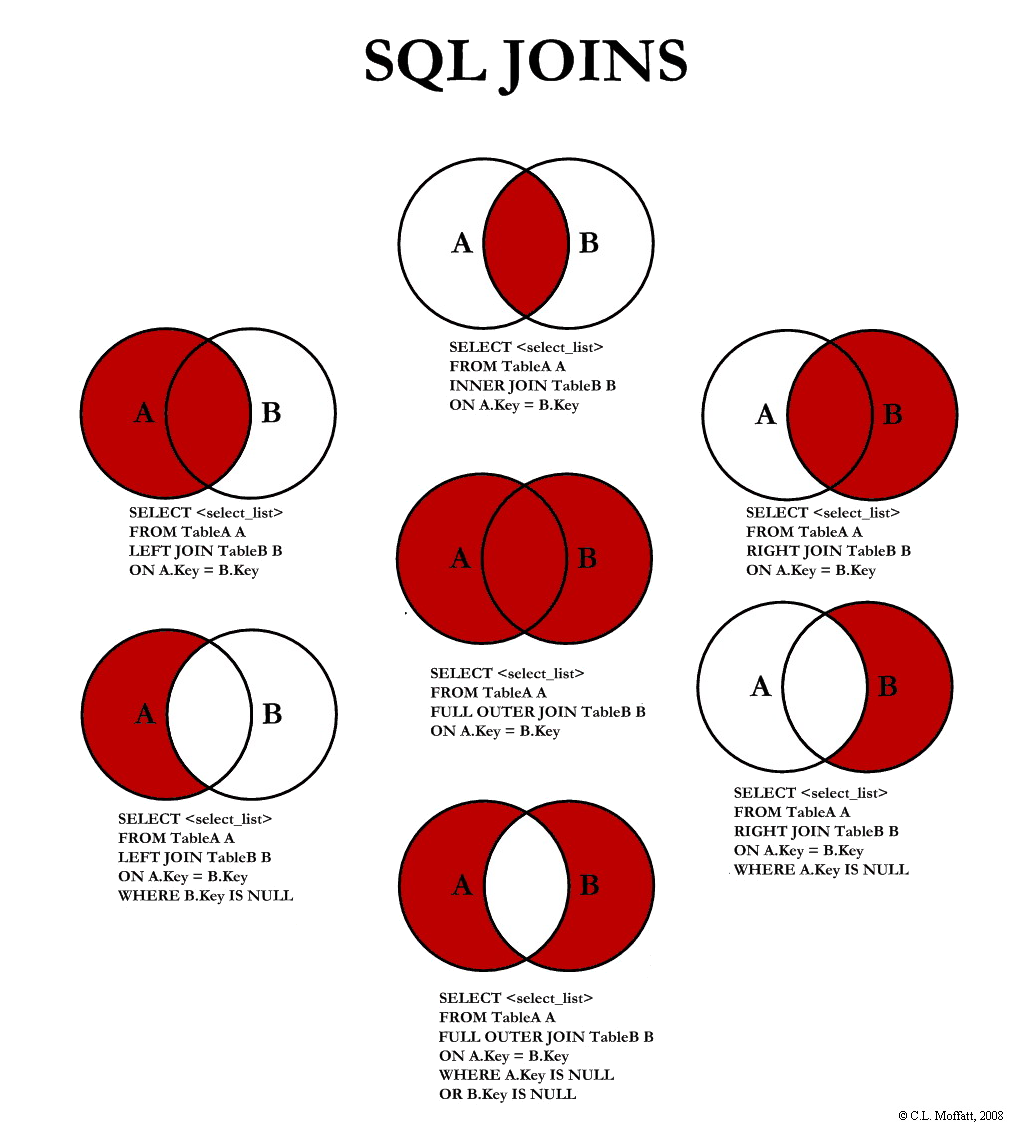

## 5.3 Объединения (CROSS JOIN, INNER JOIN)

In [130]:
# Загрузка скрипта с укороченной версией базы данных

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='lolik`12*-',
)

cursor = connection.cursor()

with open(r'data/fulldb-short.sql', encoding="utf-8") as f:
    commands = f.read().split(';')

for command in commands:
    cursor.execute(command)
    print(command)

connection.close()

-- MariaDB dump 10.19  Distrib 10.11.7-MariaDB, for Linux (x86_64)
--
-- Host: mysql.hostinger.ro    Database: u574849695_23
-- ------------------------------------------------------
-- Server version	10.11.7-MariaDB-cll-lve

/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */

/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */

/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */

/*!40101 SET NAMES utf8mb4 */

/*!40103 SET @OLD_TIME_ZONE=@@TIME_ZONE */

/*!40103 SET TIME_ZONE='+00:00' */

/*!40014 SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0 */

/*!40014 SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0 */

/*!40101 SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='NO_AUTO_VALUE_ON_ZERO' */

/*!40111 SET @OLD_SQL_NOTES=@@SQL_NOTES, SQL_NOTES=0 */



DROP DATABASE IF EXISTS stepik

CREATE SCHEMA stepik

USE stepik


--
-- Table structure for table `channel_message_reactions`
--

DROP TABLE IF EXISTS users

CREATE TABLE use

## 5.4 Объединения (LEFT JOIN, RIGHT JOIN)

## 5.5 Объединения (FULL OUTER JOIN)

## 5.6 Вложенные запросы VS объединения

## 5.7 Соединения (UNION)

## 5.8 Оконные функции

## 5.9 Общие табличные выражения (CTE)

## 5.10 Рекурсивные табличные выражения

In [ ]:
SELECT
    firstname,
    lastname,
    birthday,
    app_language
FROM users u
JOIN user_settings us
ON u.id = us.user_id
WHERE u.id = 10;